<a href="https://colab.research.google.com/github/ilkerthegeek/MachineLearning_Amazon/blob/main/code_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP1804-Machine Learning Course Work**

**Amazon Review - Text Classification Task**

**Name : Ilker Ozturk**

**Student Id: 001187380**





# **PART 1 - PRODUCT CATEGORY PREDICTION**
# **Product category Prediction(Binary)**

In [ ]:
# Importing necessary libraries 
#Basic libraries
!pip install keras
!pip install np_utils
!pip install tensorflow
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# Load python modules
from sklearn import model_selection

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing import text, sequence
from keras.preprocessing.sequence import pad_sequences
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from keras.layers.core import Dense, SpatialDropout1D
import tensorflow as tf
tf.keras.layers
import tensorflow.keras.layers
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.layers import LSTM

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet, stopwords
from keras.utils.np_utils import to_categorical
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

     |████████████████████████████████| 61 kB 617 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=f0f1014c7b6543d83a0d9e9d66fb4c152d4f2d65b4618a4a05f7bd081a3cfdd7
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils
     |████████████████████████████████| 462 kB 4.2 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [ ]:
# Load dataset from local drive (for colab notebook)
# processed_reviews_split_surnamesO_minimal.csv is going to be installed with the help of the choose button.
from google.colab import files
import io

uploaded = files.upload()    # Will prompt you to select file: ! "processed_reviews_split_surnamesO_minimal.csv"
train_dataset = pd.read_csv(io.BytesIO(uploaded['processed_reviews_split_surnamesO_minimal.csv']))

Saving processed_reviews_split_surnamesO_minimal.csv to processed_reviews_split_surnamesO_minimal.csv


# **EDA AND DATA CLEANING**

In [ ]:
# Training data
# shape of input: 
# The number or rows is the number of data points
# The number or columns is the number of features
print(train_dataset.shape)

(32917, 5)


In [ ]:
# list of column titles 
print(train_dataset.columns)

Index(['review_id', 'text', 'verified', 'review_score', 'product_category'], dtype='object')


In [ ]:
# list of column (field) data types
print(train_dataset.dtypes)

review_id            object
text                 object
verified             object
review_score        float64
product_category     object
dtype: object


In [ ]:
# Checking the firs 10 rows in a dataframe with the function "head"
train_dataset.head(10)


review_id                                               text  \
0  product_review_000000  Just a great game. It looks absolutely outstan...   
1  product_review_000001  I bought these to help finish a pedal board I ...   
2  product_review_000002  Exactly the same tube that was in my amp (VOX ...   
3  product_review_000003  Fantastic string cleaner.\n\nA few months late...   
4  product_review_000004  My 11-year-old son LOVES this game.  He is an ...   
5  product_review_000005  I was very skeptical for this game coming to V...   
6  product_review_000006  I tried this case it would work if only you co...   
7  product_review_000007  I've had a Lycosa for about 3 years now. Save ...   
8  product_review_000008  This is a great game, at first I wasn't sure I...   
9  product_review_000009  Give us only one large console which i don't w...   

  verified  review_score     product_category  
0     True           5.0          video_games  
1     True           5.0  musical_instruments  
2     True           5.0  musical_instruments  
3     True           5.0  musical_instruments  
4     True           5.0          video_games  
5    False           5.0          video_games  
6     True           5.0          video_games  
7    False           4.0          video_games  
8    False           5.0          video_games  
9    False           1.0          video_games

In [ ]:
# you can also show a random subset of the data with the function "sample":
train_dataset.sample(10)

review_id  \
13374  product_review_013374   
20378  product_review_020378   
28404  product_review_028404   
17554  product_review_017554   
7416   product_review_007416   
17602  product_review_017602   
24583  product_review_024583   
22611  product_review_022611   
1894   product_review_001894   
22073  product_review_022073   

                                                    text verified  \
13374  Awesome strap, a little long, but that's bette...     True   
20378  Great and works! The last one I bought from am...     True   
28404  I haven't played around much, but, I already L...     True   
17554  Great game. The new MyCareer mode has improved...     True   
7416   This ball is awesome and will definitely bring...     True   
17602                           Great game lots of fun.     False   
24583  These are very economical "F" style tuners, wo...     True   
22611  Spot on emulation and save states certainly eq...    False   
1894                            IF I RULED THE SCHOOL!.     False   
22073  Fun game and this time you get to travel aroun...    False   

       review_score     product_category  
13374           5.0  musical_instruments  
20378           5.0          video_games  
28404           5.0          video_games  
17554           5.0          video_games  
7416            5.0  musical_instruments  
17602           5.0          video_games  
24583           5.0  musical_instruments  
22611           5.0          video_games  
1894            5.0          video_games  
22073           5.0          video_games

In [ ]:
# Summary statistics for review score
train_dataset.describe()

review_score
count  32917.000000
mean       4.089589
std        1.434887
min       -1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

In [ ]:
# let's list all categorical features
categorical_columns= ['verified', 'review_score', 'product_category']

#  categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(train_dataset[col].value_counts())
  print()

Categories and number of occurrences for 'verified'



Categories and number of occurrences for 'review_score'



Categories and number of occurrences for 'product_category'


In [ ]:
# Except accepted values all the values will be Nan because I figured out that there are 907 rows with -1 value.
# I decided to make them null and after that I will use the most frequent value to fill them. 
# Data is so precious so we shouldnt get rid of from the data easily. 
# It is 907 rows and it is less than %3 of total rows so using the most frequent value will not change the result dramatically.
accepted_review_scores = [1,2,3,4,5]
train_dataset.loc[train_dataset.review_score.map(lambda x: x not in accepted_review_scores),'review_score'] = np.nan

In [ ]:
# let's list all categorical features for advanced EDA
categorical_columns= ['verified', 'review_score', 'product_category']


# let's get the categories and their count for each feature to analyze the data
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(train_dataset[col].value_counts())
  print()

Categories and number of occurrences for 'verified'



Categories and number of occurrences for 'review_score'



Categories and number of occurrences for 'product_category'


In [ ]:
# Number of missing values per column
# I figured out that also there are 115 rows also as Nan but there are 2 options only so using the most frequent technique is a right thing to do.
train_dataset.isna().sum() #df.isna() #df.isnull()

review_id             0
text                 14
verified            115
review_score        907
product_category    906
dtype: int64

In [ ]:
train_dataset.sample(10)

review_id  \
16794  product_review_016794   
24166  product_review_024166   
12421  product_review_012421   
11320  product_review_011320   
7609   product_review_007609   
266    product_review_000266   
20028  product_review_020028   
29873  product_review_029873   
30295  product_review_030295   
24854  product_review_024854   

                                                    text verified  \
16794  It's actually a fun game, once you get the upd...     True   
24166                            game looks ok work ok.      True   
12421  It's ok, no cheat codes, so prepare to die a l...     True   
11320  its got to be the best multi player coop game ...     True   
7609   These vertical controller stands are nice. Hav...     True   
266    I really enjoy this game.  They have done a ni...     True   
20028  I had alot of fun in Bioshock.  The environmen...     True   
29873  this game was okay, not what i really like but...    False   
30295  I have a lot of arthrtis in my hands.  This to...     True   
24854  Bought it for my Granddaughter for Christmas g...     True   

       review_score product_category  
16794           4.0      video_games  
24166           4.0              NaN  
12421           2.0      video_games  
11320           5.0      video_games  
7609            4.0      video_games  
266             4.0      video_games  
20028           4.0      video_games  
29873           3.0      video_games  
30295           3.0              NaN  
24854           4.0      video_games

In [ ]:
# handling missing data
# I decided to use most_frequent technique to fill Nan values for categorical datas which are verifired,review_score adn product_category.
from sklearn.impute import SimpleImputer 

train_dataset_no_nans =  train_dataset.copy()
# 1. Imputer
imptr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for categorical features)
imptr_cat = imptr_cat.fit(train_dataset_no_nans[categorical_columns])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
train_dataset_no_nans[categorical_columns] = imptr_cat.transform(train_dataset_no_nans[categorical_columns]) 


In [ ]:
# checking the results
# only 14 text field remained as Nan in my dataset
# It is a small amount of data which can easily be ignored.
# I dropped the data because it is not logical use handling missing data methodologies. I dropped 14 rows . 
train_dataset_no_nans.isna().sum()

review_id            0
text                14
verified             0
review_score         0
product_category     0
dtype: int64

In [ ]:
# from google.colab import files
# DATA IS SO PRECIOUS SO I USED HANDLING MISSING DATA TECHNIQUES BUT IF TEXT IS EMPTY I CAN NOT HANDLE IT.
# I CREATED A DATASET AND DOWNLOADED IT AS .CSV FILE FOLLOWING CODE CREATES THE CSV FILE INCLUDES THE EXCLUDED DATAS. 
# I dropped the 14 rows empty text and they arer saved as .CSV file. 

# nans = train_dataset_no_nans[train_dataset_no_nans['text'].isna()]
# nans=nans[['review_id']].reset_index(drop=True)
# nans['excluded']=1
# nans['reason_for_exclusion'] = 'missing_value_or_label'
# nans.head(14)

# nans.to_csv('exclusions_dataset_task4.csv', encoding = 'utf-8-sig') 
# files.download('exclusions_dataset_task4.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# I dropped the 14 rows empty text data
train_dataset_no_nans=train_dataset_no_nans.dropna()

In [ ]:
# I just checked the dataset to see any missing data left
train_dataset_no_nans.isna().sum() 

review_id           0
text                0
verified            0
review_score        0
product_category    0
dtype: int64

In [ ]:
# Checking the shape again to see anything corrupted or not
train_dataset_no_nans.shape

(32903, 5)

In [ ]:
# remove non alphanumeric 
train_dataset_no_nans['text'] = train_dataset_no_nans.text.str.replace('[^a-zA-Z0-9 ]', '')

In [ ]:
# Checking the data set using sample to see if something is wrong
train_dataset_no_nans.sample(10)

review_id  \
30968  product_review_030968   
11921  product_review_011921   
19822  product_review_019822   
22402  product_review_022402   
6059   product_review_006059   
31079  product_review_031079   
17081  product_review_017081   
3107   product_review_003107   
369    product_review_000369   
31108  product_review_031108   

                                                    text verified  \
30968  Ring of Fates is a great dungeon crawler with ...    False   
11921  As a gamer I need to hear the footsteps of opp...     True   
19822  Rune Factory 4 is a solid game for the 3ds it ...     True   
22402  Modern Warfare 3 is a solid FirstPerson Shoote...     True   
6059   Super Mario World is a game that runs synonymo...    False   
31079  Amazing game definitely worth the money I have...    False   
17081  I love these picks Theyve got a great feel in ...     True   
3107   Just more skylanders to add to my sons collect...     True   
369    This is the official cable from Nintendo I do ...    False   
31108  I have a pertty big experience with MMOsWorld ...     True   

      review_score     product_category  
30968          4.0          video_games  
11921          5.0          video_games  
19822          5.0          video_games  
22402          4.0          video_games  
6059           5.0          video_games  
31079          5.0          video_games  
17081          5.0  musical_instruments  
3107           4.0          video_games  
369            5.0          video_games  
31108          4.0          video_games

In [ ]:
# Checking the data set to see the distribution of values for review_score
train_dataset_no_nans.review_score.value_counts()

5.0    20191
4.0     6172
3.0     3136
1.0     1860
2.0     1544
Name: review_score, dtype: int64

In [ ]:
# I created copies of dataset because I am going to use them for different tasks.
# I created them to not repeat the same code.
copyOfNan = train_dataset_no_nans.copy()
copyoftrain= train_dataset_no_nans.copy()

In [ ]:
secondset = train_dataset_no_nans.copy()
thirdset = train_dataset_no_nans.copy()

In [ ]:
# Creating a list of stop words using the library.
stopwords_list = stopwords.words('english')

In [ ]:
copyOfNan.sample(10)

review_id  \
12612  product_review_012612   
30437  product_review_030437   
6018   product_review_006018   
16496  product_review_016496   
10507  product_review_010507   
9137   product_review_009137   
4005   product_review_004005   
27465  product_review_027465   
23957  product_review_023957   
26898  product_review_026898   

                                                    text verified  \
12612  ever sence i got this game my grandson and i p...     True   
30437  The belt is too large so im not using However ...     True   
6018   Story Line  movie like I will avenge my father...    False   
16496  The Kid plays Pikmin and loved this AmiiboAs a...     True   
10507                awesome shipping just as described      True   
9137   Now as an extreme RF2 fan I waited all summer ...    False   
4005   Some of my UMD casesmovies are too thick for t...     True   
27465  As described great price and quality product t...     True   
23957  Its really great product Its for my first expe...    False   
26898          My son loves it He is sold on it as am I      True   

      review_score     product_category  
12612          5.0          video_games  
30437          4.0  musical_instruments  
6018           3.0          video_games  
16496          5.0          video_games  
10507          5.0  musical_instruments  
9137           5.0          video_games  
4005           4.0          video_games  
27465          5.0  musical_instruments  
23957          5.0          video_games  
26898          4.0          video_games

In [ ]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
# I encoded the product_category field to make predictions later. It is just number values after that point.
# Encode labels in column 'product_category'. 
copyOfNan['product_category']= label_encoder.fit_transform(copyOfNan['product_category']) 
  
copyOfNan['product_category'].unique() 

array([1, 0])

In [ ]:
# Checking the distribution of the values.
copyOfNan['product_category'].value_counts()

1    22771
0    10132
Name: product_category, dtype: int64

In [ ]:
#Extracting 'reviews' for processing
# review_feautures includes the review data only.
review_features=copyOfNan.copy()
review_features=review_features[['text']].reset_index(drop=True)
review_features.head()

text
0  Just a great game It looks absolutely outstand...
1  I bought these to help finish a pedal board I ...
2  Exactly the same tube that was in my amp VOX V...
3  Fantastic string cleanerA few months later  I ...
4  My 11yearold son LOVES this game  He is an arm...

In [ ]:
#Filtering data
# I encoded the label so I am checking with the values.
review_video = copyOfNan[copyOfNan["product_category"]== 1].dropna()
review_music = copyOfNan[copyOfNan["product_category"]== 0].dropna()




In [ ]:
print(review_music['text'])

1        I bought these to help finish a pedal board I ...
2        Exactly the same tube that was in my amp VOX V...
3        Fantastic string cleanerA few months later  I ...
16       These seem to outlast the other makes  I can b...
22       I checked the internal connection as it has be...
                               ...                        
32902    First off For a company that sells guitar stri...
32903    Playing through an alto the Fibracell changes ...
32913    Small but Nice It works a lot better then the ...
32915    Cheap but not nasty Great piece of gear for th...
32916    Works very well in protecting my guitars and p...
Name: text, Length: 10132, dtype: object


# **WORD CLOUD OF MUSIC REVIEWS**




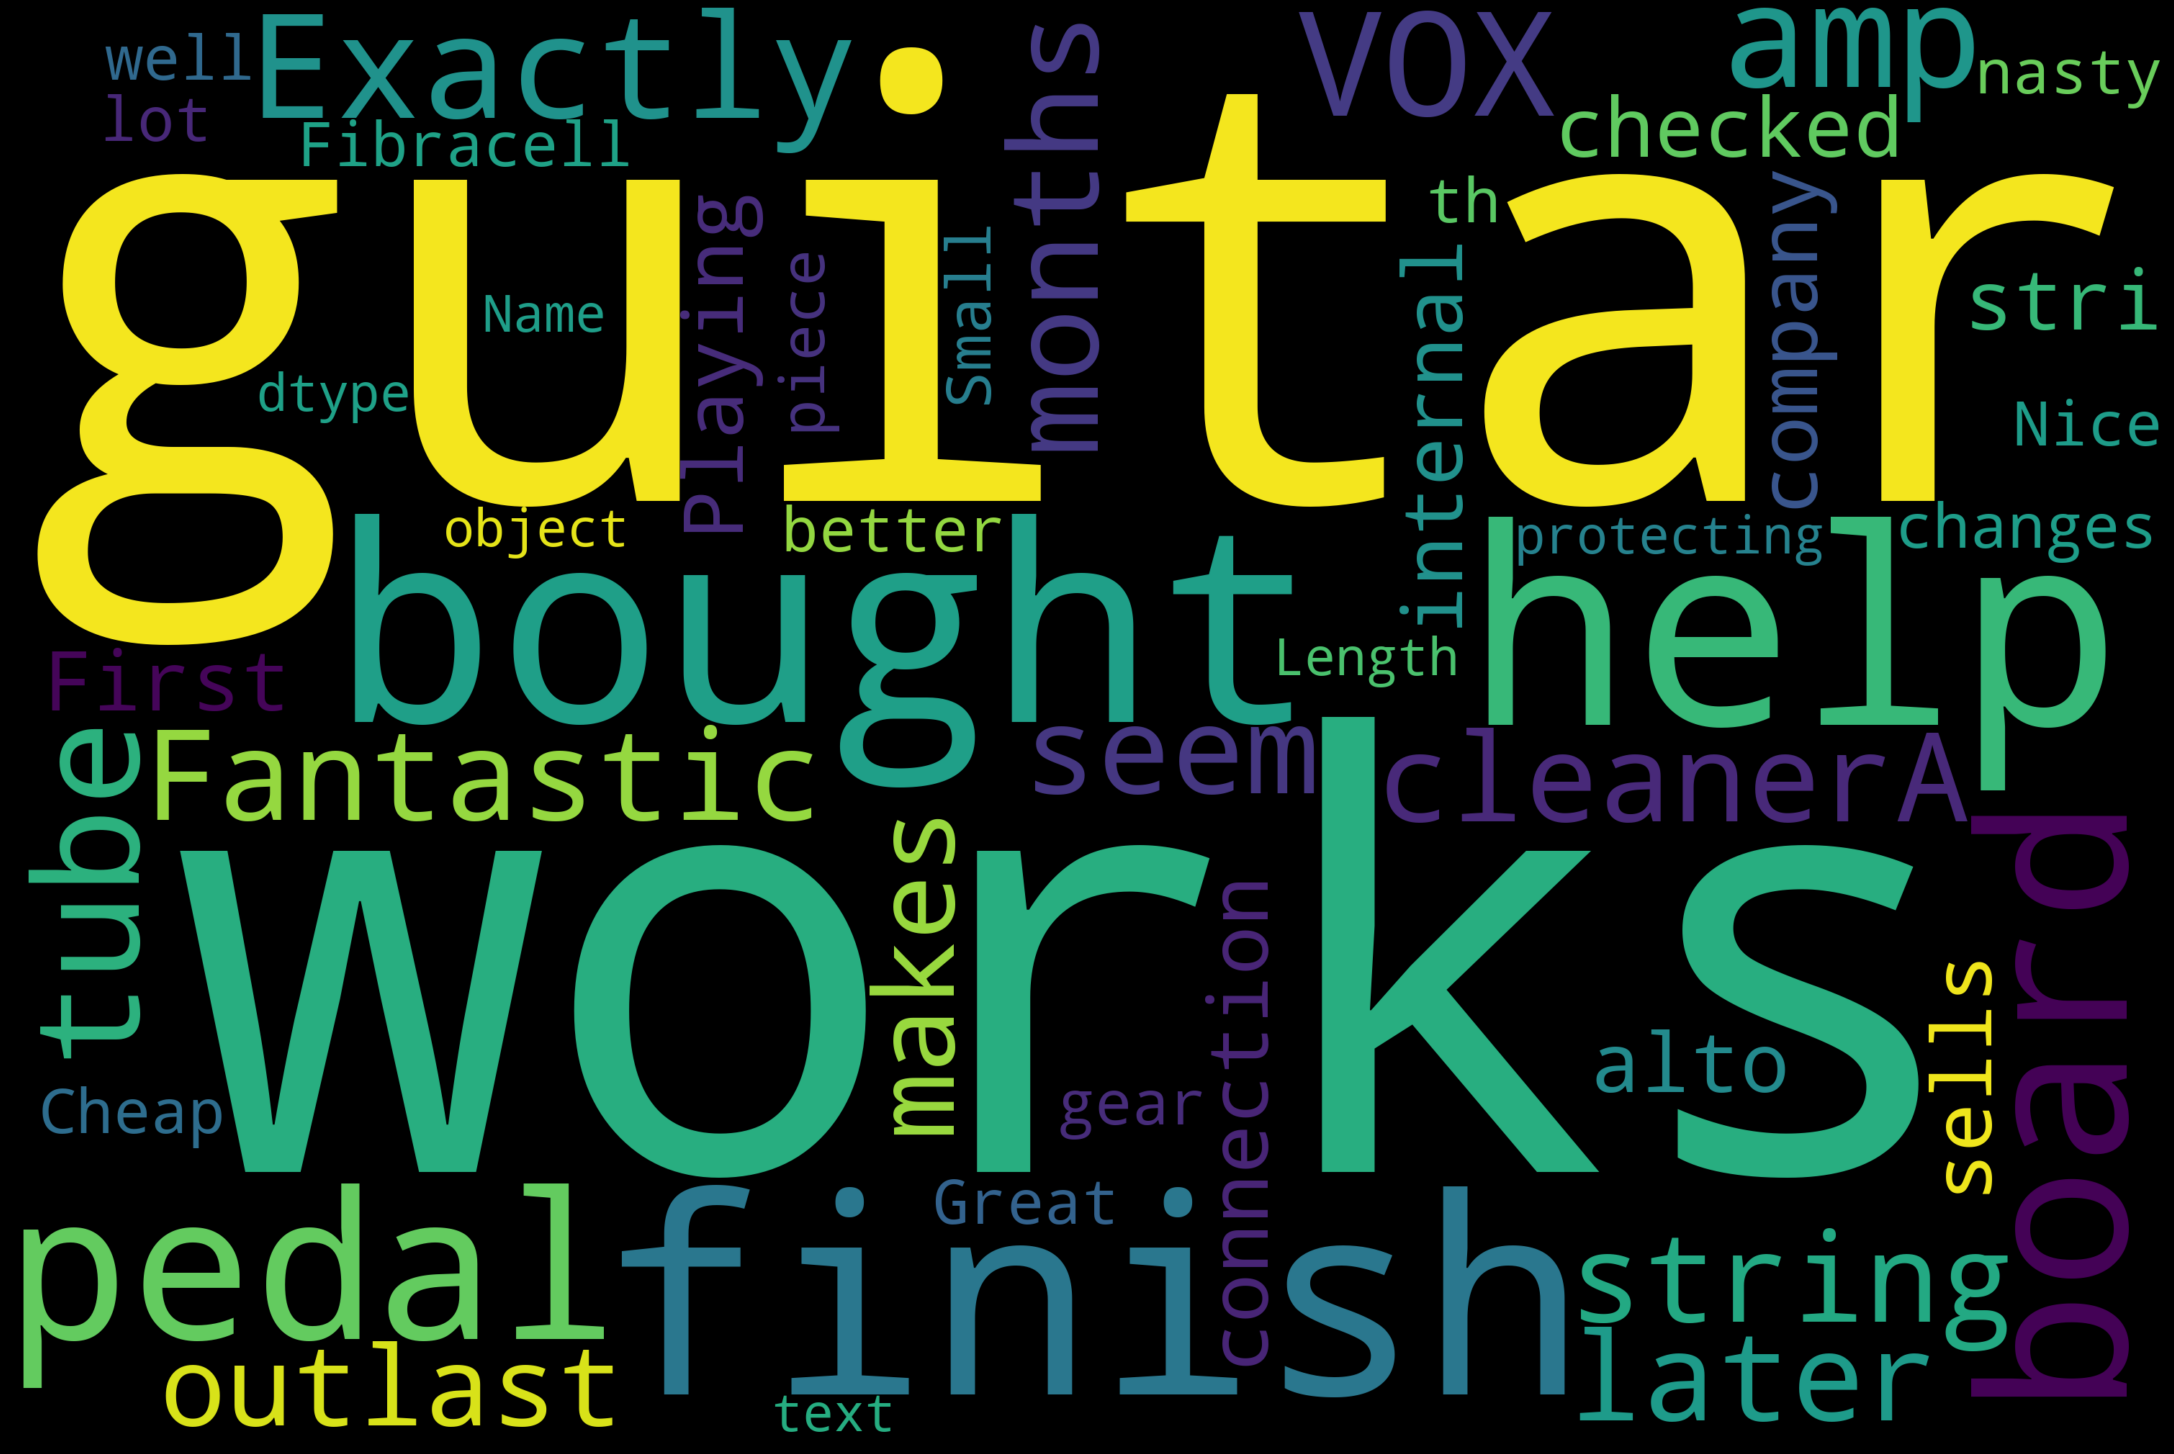

In [ ]:
text = review_music["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **WORD CLOUD OF VIDEO GAMES REVIEWS**




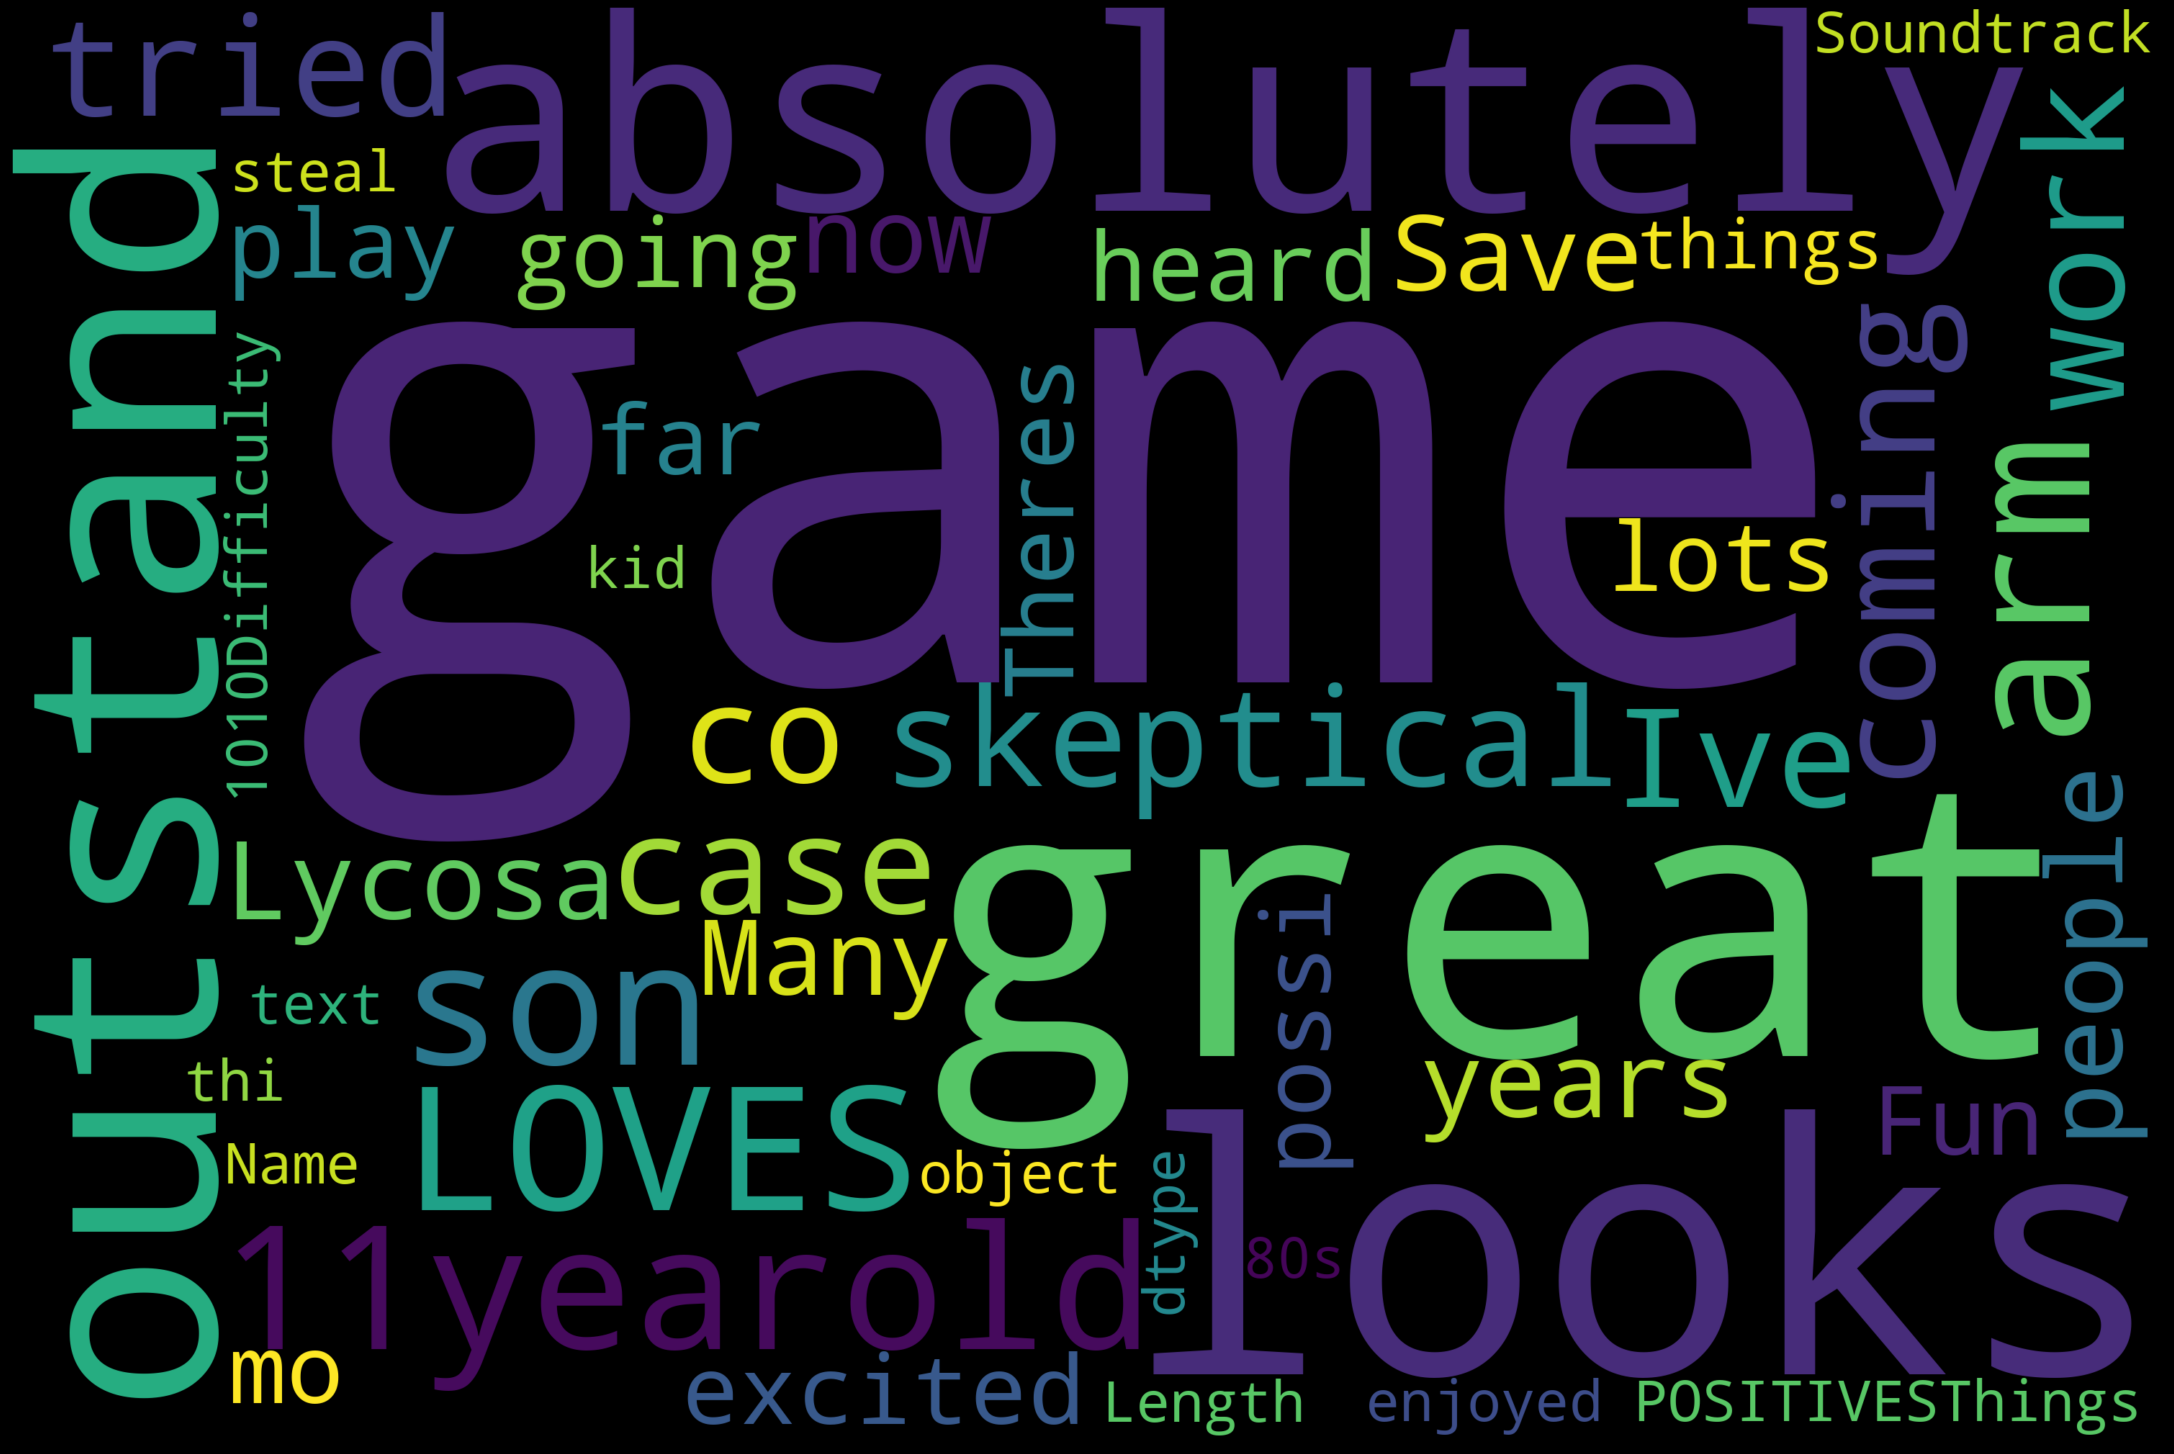

In [ ]:
text = review_video["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **DATA SPLITTING**

In [ ]:
#Performing stemming on the review dataframe
#When dealing with text processing, for example, when performing a simple search, we are more interested in the root form of the word than the suffix.
#There are generally two methods for accessing the root word: stemming and lemmatization.
#The purpose of both operations is the same: to strip each word of its suffixes and turn them into a common base or root.
# I decided to use PorterStemmer() because The most common in English is Porter Stammer.

ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['text'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords_list]
    review = ' '.join(review)
    corpus.append(review)    

In [ ]:
corpus[3]

'fantast string cleanera month later I use month whenev matter I bow seem mind sound lousi just tip bottl onto clean cloth hold two second then squeez string cloth rub way time when done let string dri short after good clean string sound fresh new beauti cellist tool great product string'

In [ ]:
y=train_dataset_no_nans['product_category']

# **TF-IDF**

In [ ]:
# The most important problem with counting term frequencies is that frequently used terms become dominant in the document and now represent the document. 
#I will use the "TF x IDF" model and scoring method to solve this problem.
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['text'])

# **SMOTE**

In [ ]:
# The first method to use when working with an unbalanced dataset is to adjust the class distributions by resampling the data. 
# These methods are undersampling, oversampling and some advanced sampling techniques.
# SMOTE (Synthetic Minority Over-Sampling Technique) is an oversampling process that produces synthetic data. It is one of the most commonly used methods in data science projects.
# The main idea of ​​the method is to create new instances of the minority class by performing certain operations between instances of the minority class.
# I preferred the SMOTE to make the dataset distributed equally.
# I checked the last situation and they are equal right now.(22771)
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({'video_games': 22771, 'musical_instruments': 10132})
Resampled dataset shape Counter({'video_games': 22771, 'musical_instruments': 22771})


In [ ]:
## Divide the dataset into Train and Test
# I preferred the 0.75 and 0.25 division for train and test.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

# **Confusion Matrix**

In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **BASIC ML METHODS**

In [ ]:
#Metrics libraries
# First I want to see which algortihm provides better results. After that I will try to improve the performance with the most suitable parameters.
# I will check the performances of Logistic Regression, DecisionTreeClassifier, Support Vector Machine and BernoulliNB.
# I am planning to optimize the best one.
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8686437544043395
Decision Tree Test Accuracy: 0.8204721267082833
KNN Test Accuracy: 0.6137731900300996
SVC Test Accuracy: 0.8734458719968524
Naive Bayes Test Accuracy: 0.6709721548775837


# **HYPER PARAMETER TUNING FOR LOGICAL REGRESSION**

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=11.513953993264458, random_state=0)
The mean accuracy of the model is: 0.8982961531705603


In [ ]:
# from the selected parameters I get the accuracy result.
# c = 11.513953993264458 random state is selected as '0'
logreg = LogisticRegression(C=11.513953993264458, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


Confusion matrix, without normalization


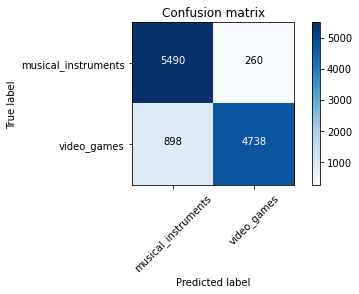

In [ ]:

# Drawing the confusion matrix after hyper tuning to visualize it.

cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['musical_instruments','video_games'])

In [ ]:
# For classification problems f1 score is so IMPORTANT!
# The result is really nice and LOGISTIC REGRESSION is suitable for this dataset.
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
                      precision    recall  f1-score   support

musical_instruments       0.86      0.95      0.90      5750
        video_games       0.95      0.84      0.89      5636

           accuracy                           0.90     11386
          macro avg       0.90      0.90      0.90     11386
       weighted avg       0.90      0.90      0.90     11386



# **PREDICTION WITH NEURAL NETWORK - CNN**

In [ ]:
# I am going to use copyoftrain which i assigned after the data cleaning to prevent code repetiotion.
# just going to check if data shape is corrupted.
copyoftrain.shape

(32903, 5)

In [ ]:
# I am going to check if the text and review_star columns are corrupted or not.
copyoftrain.sample(10)

review_id  \
14767  product_review_014767   
23248  product_review_023248   
23136  product_review_023136   
4054   product_review_004054   
8093   product_review_008093   
42     product_review_000042   
896    product_review_000896   
26401  product_review_026401   
12526  product_review_012526   
10891  product_review_010891   

                                                    text verified  \
14767                           DOA did not work at all      True   
23248  I took a chance on these without finding a goo...     True   
23136  couldnt get the tuning correct without this ha...     True   
4054   Purchased this from Cards1StopShop with FBA fu...     True   
8093                                   Buy them get them     True   
42     Put a set on today Love the crisp sound and ea...     True   
896    Exactly as described we had other ones of thes...     True   
26401  Great but not for big fingers  Best for smallm...     True   
12526  this was a goodbye Im glad I bought it Im glad...     True   
10891  First of all this is a really fun and addictiv...    False   

      review_score     product_category  
14767          1.0          video_games  
23248          5.0  musical_instruments  
23136          5.0          video_games  
4054           5.0          video_games  
8093           5.0          video_games  
42             5.0  musical_instruments  
896            5.0          video_games  
26401          4.0  musical_instruments  
12526          4.0  musical_instruments  
10891          4.0          video_games

# **DATA SPLITTING 2**

In [ ]:
sentences = copyoftrain['text']
y = copyoftrain['product_category']
# i am going to split as 0.75 / 0.25
sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.25, random_state=42)

# **WORD EMBEDDINGS FOR CNN**

In [ ]:
# Word Embedding is a representation of text where words that have the same meaning have a similar representation. 
# It shows words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. 
# In the deep learning frameworks such as Keras, this part is generally handled by an embedding layer.
tokenize = Tokenizer(num_words=1000)
tokenize.fit_on_texts(sentences_train)

X_train = tokenize.texts_to_sequences(sentences_train)
X_test = tokenize.texts_to_sequences(sentences_test)

vocab_size = len(tokenize.word_index) + 1  

print(sentences_train[2])
print(X_train[2])

Exactly the same tube that was in my amp VOX VT15 not an easy change but I did it Fast shipping got to Sacramento fast Amp works much better now
[27, 10, 15, 5, 81, 26, 1, 207, 78, 46, 18, 50, 79, 264, 6, 44, 2, 355, 368, 26, 37, 34, 940, 1, 17, 1, 207, 96, 35, 5, 198, 8, 289, 29, 143, 3, 223, 246, 8, 318, 3, 89, 16, 50, 765, 6, 68, 7, 110, 9, 213, 4, 77, 8, 344, 305, 43, 1, 229, 630, 6, 1, 92, 2, 538, 8, 3, 935, 528]


In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[112   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
# Encoding the product_category which is the target for our prediction.
from tensorflow.python.keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

num_classes = np.max(y_train) + 1
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# **Building the neural Network**

In [ ]:
 # I am going to train several models and i am going to choose the best one. First one is simple neural network
embedding_dim = 16

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           1240160   
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 16)               25616     
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 2)                34        
 pper)                                                           
                                                                 
Total params: 1,265,810
Trainable params: 1,265,810
Non-trainable params: 0
_________________________________________________________________


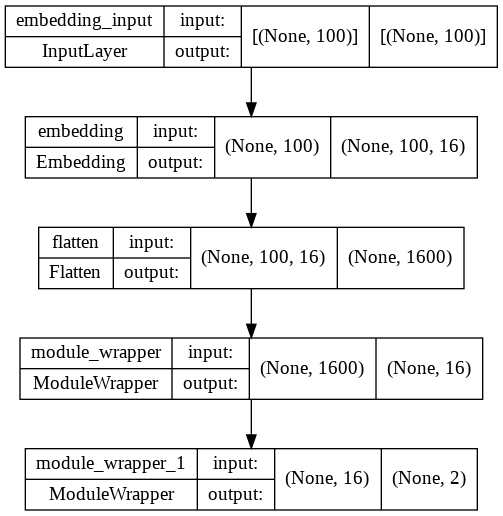

In [ ]:
# I am going to show the layers as a graph.
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test))

Epoch 1/15
772/772 [==============================] - 7s 8ms/step - loss: 0.2912 - accuracy: 0.8559 - val_loss: 0.1999 - val_accuracy: 0.9093
Epoch 2/15
772/772 [==============================] - 6s 8ms/step - loss: 0.1798 - accuracy: 0.9198 - val_loss: 0.1962 - val_accuracy: 0.9087
Epoch 3/15
772/772 [==============================] - 6s 8ms/step - loss: 0.1576 - accuracy: 0.9300 - val_loss: 0.2001 - val_accuracy: 0.9119
Epoch 4/15
772/772 [==============================] - 6s 7ms/step - loss: 0.1338 - accuracy: 0.9429 - val_loss: 0.2080 - val_accuracy: 0.9103
Epoch 5/15
772/772 [==============================] - 6s 7ms/step - loss: 0.1145 - accuracy: 0.9513 - val_loss: 0.2257 - val_accuracy: 0.9104
Epoch 6/15
772/772 [==============================] - 6s 7ms/step - loss: 0.0998 - accuracy: 0.9578 - val_loss: 0.2521 - val_accuracy: 0.9070
Epoch 7/15
772/772 [==============================] - 6s 8ms/step - loss: 0.0880 - accuracy: 0.9626 - val_loss: 0.2745 - val_accuracy: 0.9003
Epoch 

In [ ]:
# Checking the accuracy.
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9807
Testing Accuracy:  0.8911


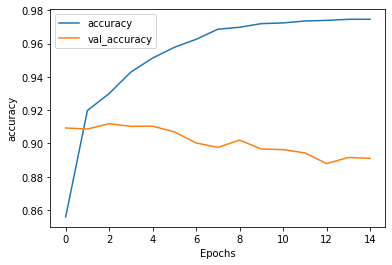

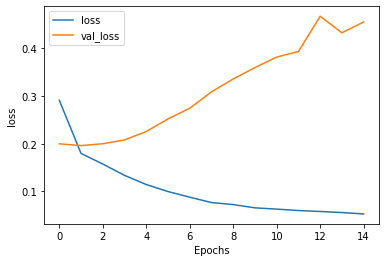

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#in the second model, I added dropout layers as regularization
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           1240160   
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 module_wrapper_2 (ModuleWra  (None, 16)               25616     
 pper)                                                           
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2)                34        
 pper)                                                           
                                                                 
Total params: 1,265,810
Trainable params: 1,265,810
No

In [ ]:
history_two = model2.fit(X_train, y_train,
                        batch_size=32,
                        epochs=15,
                        validation_data=(X_test, y_test))

Epoch 1/15
772/772 [==============================] - 7s 8ms/step - loss: 0.3309 - accuracy: 0.8462 - val_loss: 0.2009 - val_accuracy: 0.9115
Epoch 2/15
772/772 [==============================] - 6s 7ms/step - loss: 0.2017 - accuracy: 0.9163 - val_loss: 0.1992 - val_accuracy: 0.9047
Epoch 3/15
772/772 [==============================] - 6s 8ms/step - loss: 0.1774 - accuracy: 0.9255 - val_loss: 0.1997 - val_accuracy: 0.9153
Epoch 4/15
772/772 [==============================] - 6s 7ms/step - loss: 0.1585 - accuracy: 0.9341 - val_loss: 0.2065 - val_accuracy: 0.9149
Epoch 5/15
772/772 [==============================] - 6s 8ms/step - loss: 0.1438 - accuracy: 0.9380 - val_loss: 0.2313 - val_accuracy: 0.9116
Epoch 6/15
772/772 [==============================] - 6s 7ms/step - loss: 0.1259 - accuracy: 0.9473 - val_loss: 0.2338 - val_accuracy: 0.9116
Epoch 7/15
772/772 [==============================] - 6s 8ms/step - loss: 0.1116 - accuracy: 0.9516 - val_loss: 0.2611 - val_accuracy: 0.9064
Epoch 

In [ ]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9674
Testing Accuracy:  0.8916


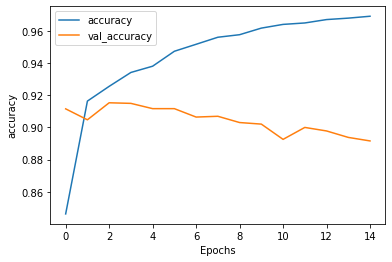

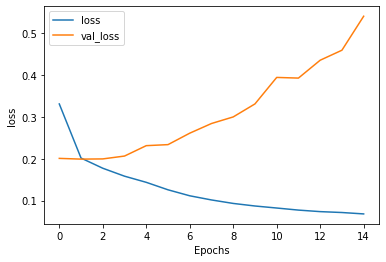

In [ ]:
plot_graphs(history_two, "accuracy")
plot_graphs(history_two, "loss")

In [ ]:
# In this case I used GlobalMaxPooling1D which is built-in layer Keras. after embedding i added it.
embedding_dim = 50

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(2, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           3875500   
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 module_wrapper_4 (ModuleWra  (None, 16)               816       
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 2)                34        
 pper)                                                           
                                                                 
Total params: 3,876,350
Trainable params: 3,876,350
Non-trainable params: 0
____________________________________________

In [ ]:
history_3 = model3.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Epoch 1/15
772/772 [==============================] - 22s 28ms/step - loss: 0.2784 - accuracy: 0.8702 - val_loss: 0.1839 - val_accuracy: 0.9181
Epoch 2/15
772/772 [==============================] - 22s 28ms/step - loss: 0.1681 - accuracy: 0.9286 - val_loss: 0.1797 - val_accuracy: 0.9189
Epoch 3/15
772/772 [==============================] - 21s 27ms/step - loss: 0.1511 - accuracy: 0.9367 - val_loss: 0.1810 - val_accuracy: 0.9205
Epoch 4/15
772/772 [==============================] - 20s 26ms/step - loss: 0.1383 - accuracy: 0.9436 - val_loss: 0.1832 - val_accuracy: 0.9220
Epoch 5/15
772/772 [==============================] - 20s 26ms/step - loss: 0.1272 - accuracy: 0.9500 - val_loss: 0.1905 - val_accuracy: 0.9213
Epoch 6/15
772/772 [==============================] - 20s 26ms/step - loss: 0.1167 - accuracy: 0.9554 - val_loss: 0.1951 - val_accuracy: 0.9181
Epoch 7/15
772/772 [==============================] - 20s 26ms/step - loss: 0.1072 - accuracy: 0.9592 - val_loss: 0.2020 - val_accuracy:

In [ ]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9838
Testing Accuracy:  0.9141


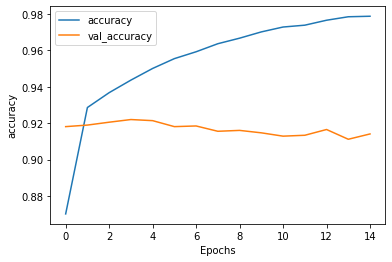

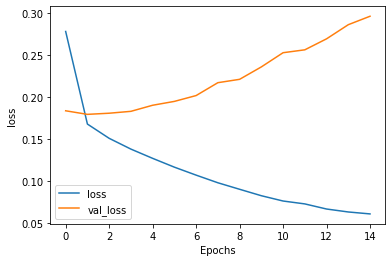

In [ ]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

# **MY FINAL NN MODEL**

In [ ]:
# Final model consists Embedding layer with GlobalMaxPool1D layer and also hidden layer with ReLu function. Uoutput layer is using softmax activation function. I also added droput layers as a regulation method.
# As optimizer I used Adam optimizer and categorical_crossentropy as the loss function. 

embedding_dim = 50

model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model4.add(GlobalMaxPool1D())
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(2, activation='softmax'))

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           3875500   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 module_wrapper_6 (ModuleWra  (None, 16)               816       
 pper)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 module_wrapper_7 (ModuleWra  (None, 2)               

In [ ]:
history_4 = model4.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Epoch 1/15
772/772 [==============================] - 19s 24ms/step - loss: 0.3114 - accuracy: 0.8489 - val_loss: 0.1866 - val_accuracy: 0.9178
Epoch 2/15
772/772 [==============================] - 18s 24ms/step - loss: 0.1886 - accuracy: 0.9201 - val_loss: 0.1787 - val_accuracy: 0.9199
Epoch 3/15
772/772 [==============================] - 18s 24ms/step - loss: 0.1728 - accuracy: 0.9288 - val_loss: 0.1790 - val_accuracy: 0.9192
Epoch 4/15
772/772 [==============================] - 18s 24ms/step - loss: 0.1631 - accuracy: 0.9349 - val_loss: 0.1777 - val_accuracy: 0.9206
Epoch 5/15
772/772 [==============================] - 18s 24ms/step - loss: 0.1559 - accuracy: 0.9376 - val_loss: 0.1792 - val_accuracy: 0.9213
Epoch 6/15
772/772 [==============================] - 17s 22ms/step - loss: 0.1505 - accuracy: 0.9383 - val_loss: 0.1785 - val_accuracy: 0.9220
Epoch 7/15
772/772 [==============================] - 19s 24ms/step - loss: 0.1450 - accuracy: 0.9427 - val_loss: 0.1821 - val_accuracy:

In [ ]:
loss, accuracy = model4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9682
Testing Accuracy:  0.9218


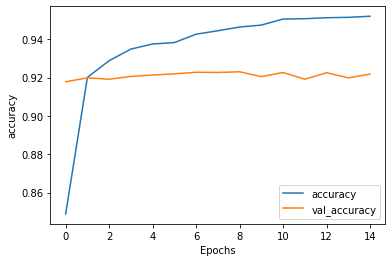

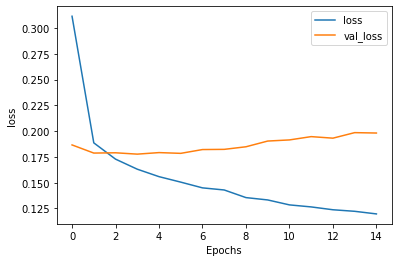

In [ ]:
plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")

# **CNN ARCHITECTURE - LAST VERSION**

In [ ]:
# I created a simple CNN architecture. Difference than the previous one , I added Conv1D layer. It seems a very efficient algorithm. Results are better than hyper tuned Logistic Regression!. 
# Neural network is more successful for predicting the product category..
embedding_dim = 50

model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model5.add(Conv1D(128, 5, activation='relu'))
model5.add(GlobalMaxPool1D())
model5.add(Dense(10, activation='relu'))
model5.add(Dense(2, activation='softmax'))

model5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           3875500   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 module_wrapper_8 (ModuleWra  (None, 10)               1290      
 pper)                                                           
                                                                 
 module_wrapper_9 (ModuleWra  (None, 2)                22        
 pper)                                                           
                                                      

In [ ]:
history_5 = model5.fit(X_train, y_train,
                       batch_size=10,
                       epochs=5,
                       validation_data=(X_test, y_test))

Epoch 1/5
2468/2468 [==============================] - 63s 25ms/step - loss: 0.2239 - accuracy: 0.8944 - val_loss: 0.2226 - val_accuracy: 0.9034
Epoch 2/5
2468/2468 [==============================] - 65s 26ms/step - loss: 0.1699 - accuracy: 0.9256 - val_loss: 0.1804 - val_accuracy: 0.9210
Epoch 3/5
2468/2468 [==============================] - 63s 26ms/step - loss: 0.1458 - accuracy: 0.9392 - val_loss: 0.2026 - val_accuracy: 0.9125
Epoch 4/5
2468/2468 [==============================] - 63s 26ms/step - loss: 0.1225 - accuracy: 0.9492 - val_loss: 0.2022 - val_accuracy: 0.9188
Epoch 5/5
2468/2468 [==============================] - 62s 25ms/step - loss: 0.1004 - accuracy: 0.9607 - val_loss: 0.2274 - val_accuracy: 0.9130


In [ ]:
loss, accuracy = model5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9726
Testing Accuracy:  0.9130


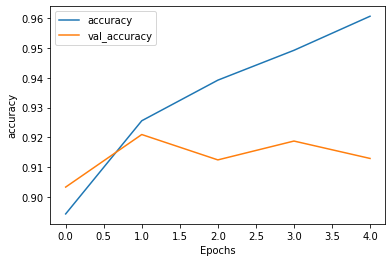

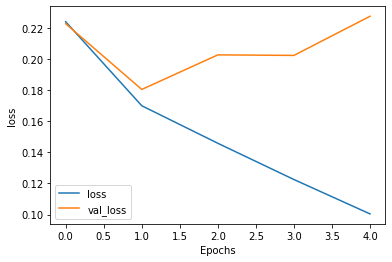

In [ ]:
plot_graphs(history_5, "accuracy")
plot_graphs(history_5, "loss")

# **Showing 3-10 examples from test dataset.**

It is correct! Our first test was successful

In [ ]:
text1 = ['Just a great game. It looks absolutely outstanding on the One. Things have changed a bit with the right stick, you now being able to both do dribble moves with it and shoot, but it gets easier with time. Would recommend to any basketball fans out there!. Love it']
seq = tokenize.texts_to_sequences(text1)
padded = pad_sequences(seq, maxlen=100)
pred = model5.predict(padded)
labels = ['musical_instruments','video_games']
print(pred, labels[np.argmax(pred)])

[[4.2377965e-06 9.9999571e-01]] video_games


It is correct! It was a video game in the test data set.

In [ ]:
text2 = ['Always loved me some Crash Bandicoot. The second one was always my favorite. So many fun adventures and the boss is always fun to defeat.Great Game']
seq = tokenize.texts_to_sequences(text2)
padded = pad_sequences(seq, maxlen=100)
pred = model5.predict(padded)
labels = ['musical_instruments','video_games']
print(pred, labels[np.argmax(pred)])

[[0.016418 0.983582]] video_games


It is CORRECT again. Text contains the one of the most common words I discovered like "cables" during ETA process.

In [ ]:
text3 = ['Great cables, work just as advertised.  No noticeable artifacts or noise introduced in the signal chain.  Great price as well!. Great cables, work just as advertised']
seq = tokenize.texts_to_sequences(text3)
padded = pad_sequences(seq, maxlen=100)
pred = model5.predict(padded)
labels = ['musical_instruments','video_games']
print(pred, labels[np.argmax(pred)])

[[0.9326413  0.06735869]] musical_instruments


It is Correct again. Text is so informative and prediction is correct.

In [ ]:
text4 = ['Great cables, work just as advertised.  No noticeable artifacts or noise introduced in the signal chain.  Great price as well!. Great cables, work just as advertised']
seq = tokenize.texts_to_sequences(text4)
padded = pad_sequences(seq, maxlen=100)
pred = model5.predict(padded)
labels = ['musical_instruments','video_games']
print(pred, labels[np.argmax(pred)])

[[0.9326413  0.06735869]] musical_instruments


It is correct again! It is hard to find the false predictions

In [ ]:
text5 = ['Now THIS is how you do a HD collection! I ve played every other HD collection out there and the production values for this one is astronomical. If you re a MGS fan this should be bought in an instant, and if you re not then buying this will make you one!. MGS 2, 3,']
seq = tokenize.texts_to_sequences(text5)
padded = pad_sequences(seq, maxlen=100)
pred = model5.predict(padded)
labels = ['musical_instruments','video_games']
print(pred, labels[np.argmax(pred)])

[[0.00631039 0.99368954]] video_games


Still Correct! which shows us how high our accuracy is!

In [ ]:
text6 = ['Great gift for my grandson.']
seq = tokenize.texts_to_sequences(text6)
padded = pad_sequences(seq, maxlen=100)
pred = model5.predict(padded)
labels = ['musical_instruments','video_games']
print(pred, labels[np.argmax(pred)])

[[0.15971442 0.8402856 ]] video_games


I found a FALSE example at last! The text contains so unrelated data and it is normal to predict it as false!

In [ ]:
text7 = ['Hard! Screamed all the way through. ']
seq = tokenize.texts_to_sequences(text7)
padded = pad_sequences(seq, maxlen=100)
pred = model5.predict(padded)
labels = ['musical_instruments','video_games']
print(pred, labels[np.argmax(pred)])

[[0.05829656 0.9417035 ]] video_games


# **PART 2 - REVIEW SCORE PREDICTION**

# **EDA AND CLEANING**

In [ ]:
# I am going to use my cleaned dataset. I will use the secondset.
# I will analyse the review stars data.
secondset.review_score.value_counts()

5.0    20191
4.0     6172
3.0     3136
1.0     1860
2.0     1544
Name: review_score, dtype: int64

In [ ]:
text_df = secondset[['review_score','text']]

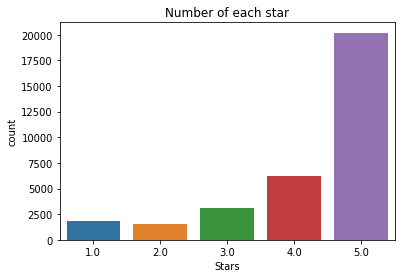

In [ ]:
sns.countplot(x='review_score',data=text_df)
plt.xlabel('Stars')
plt.title('Number of each star');

In [ ]:
text_df['length'] = text_df['text'].apply(len)

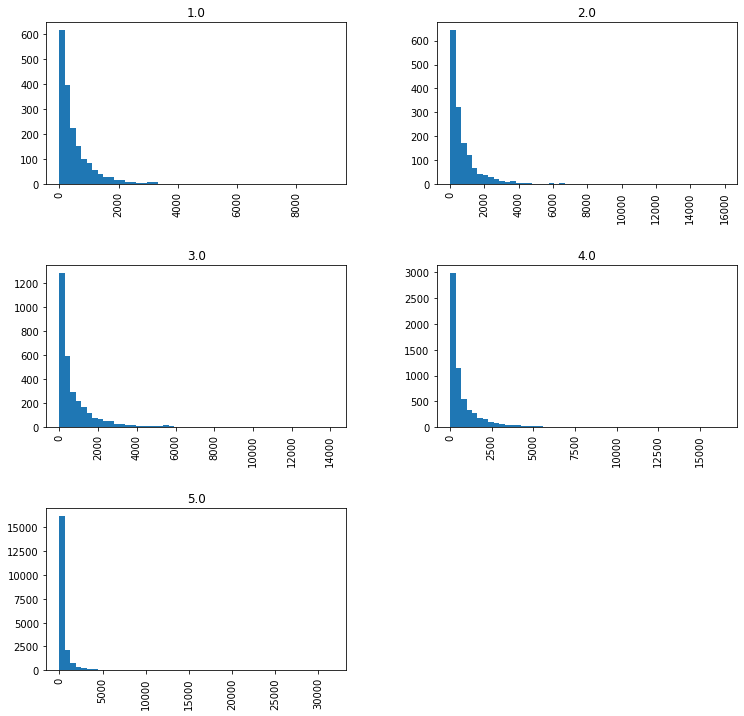

In [ ]:
# length of reviews for each star category.
text_df.hist(column='length', by='review_score', bins=50,figsize=(12,12));

# **Text Pre-processing**

In [ ]:
text_df.head()

review_score                                               text  length
0          5.0  Just a great game It looks absolutely outstand...     255
1          5.0  I bought these to help finish a pedal board I ...     196
2          5.0  Exactly the same tube that was in my amp VOX V...     144
3          5.0  Fantastic string cleanerA few months later  I ...     469
4          5.0  My 11yearold son LOVES this game  He is an arm...     267

In [ ]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
# I encoded the product_category field to make predictions later. It is just number values after that point.
# Encode labels in column 'product_category'. 
text_df['review_score']= label_encoder.fit_transform(text_df['review_score']) 
  
text_df['review_score'].unique() 

array([4, 3, 0, 2, 1])

In [ ]:
# Checking the distribution of the values.
text_df['review_score'].value_counts()

4    20191
3     6172
2     3136
0     1860
1     1544
Name: review_score, dtype: int64

In [ ]:
#Extracting 'reviews' for processing
# review_feautures includes the review data only.
review_text_df=text_df.copy()
review_text_df=review_text_df[['text']].reset_index(drop=True)
review_text_df.head()

text
0  Just a great game It looks absolutely outstand...
1  I bought these to help finish a pedal board I ...
2  Exactly the same tube that was in my amp VOX V...
3  Fantastic string cleanerA few months later  I ...
4  My 11yearold son LOVES this game  He is an arm...

In [ ]:
#Filtering data
# I encoded the label so I am checking with the values. I checked the star values with their encoded values.
one_star = text_df[text_df["review_score"]== 0].dropna()
two_stars = text_df[text_df["review_score"]== 1].dropna()
three_stars = text_df[text_df["review_score"]== 2].dropna()
four_stars = text_df[text_df["review_score"]== 3].dropna()
five_stars = text_df[text_df["review_score"]== 4].dropna()




In [ ]:
print(one_star['text'])

9        Give us only one large console which i dont wa...
30       A very disappointing entry in the game series ...
70       Does not work at all Blue light comes on and t...
82       I ordered a white headset for my Xbox 360 I di...
113      clearly says 4x only received 2 also they are ...
                               ...                        
32803    this game not working I recommended dont buy t...
32877    I feel ripped off The hype for this game was u...
32879                                       WILL NOT PLAY 
32893    I have owned 2 AX360s and 1 AXPRO and I have h...
32910    This game excited me when I heard of its possi...
Name: text, Length: 1860, dtype: object


# **WORD CLOUD OF REVIEW SCORES**




**WORD CLOUD OF ONE STAR**

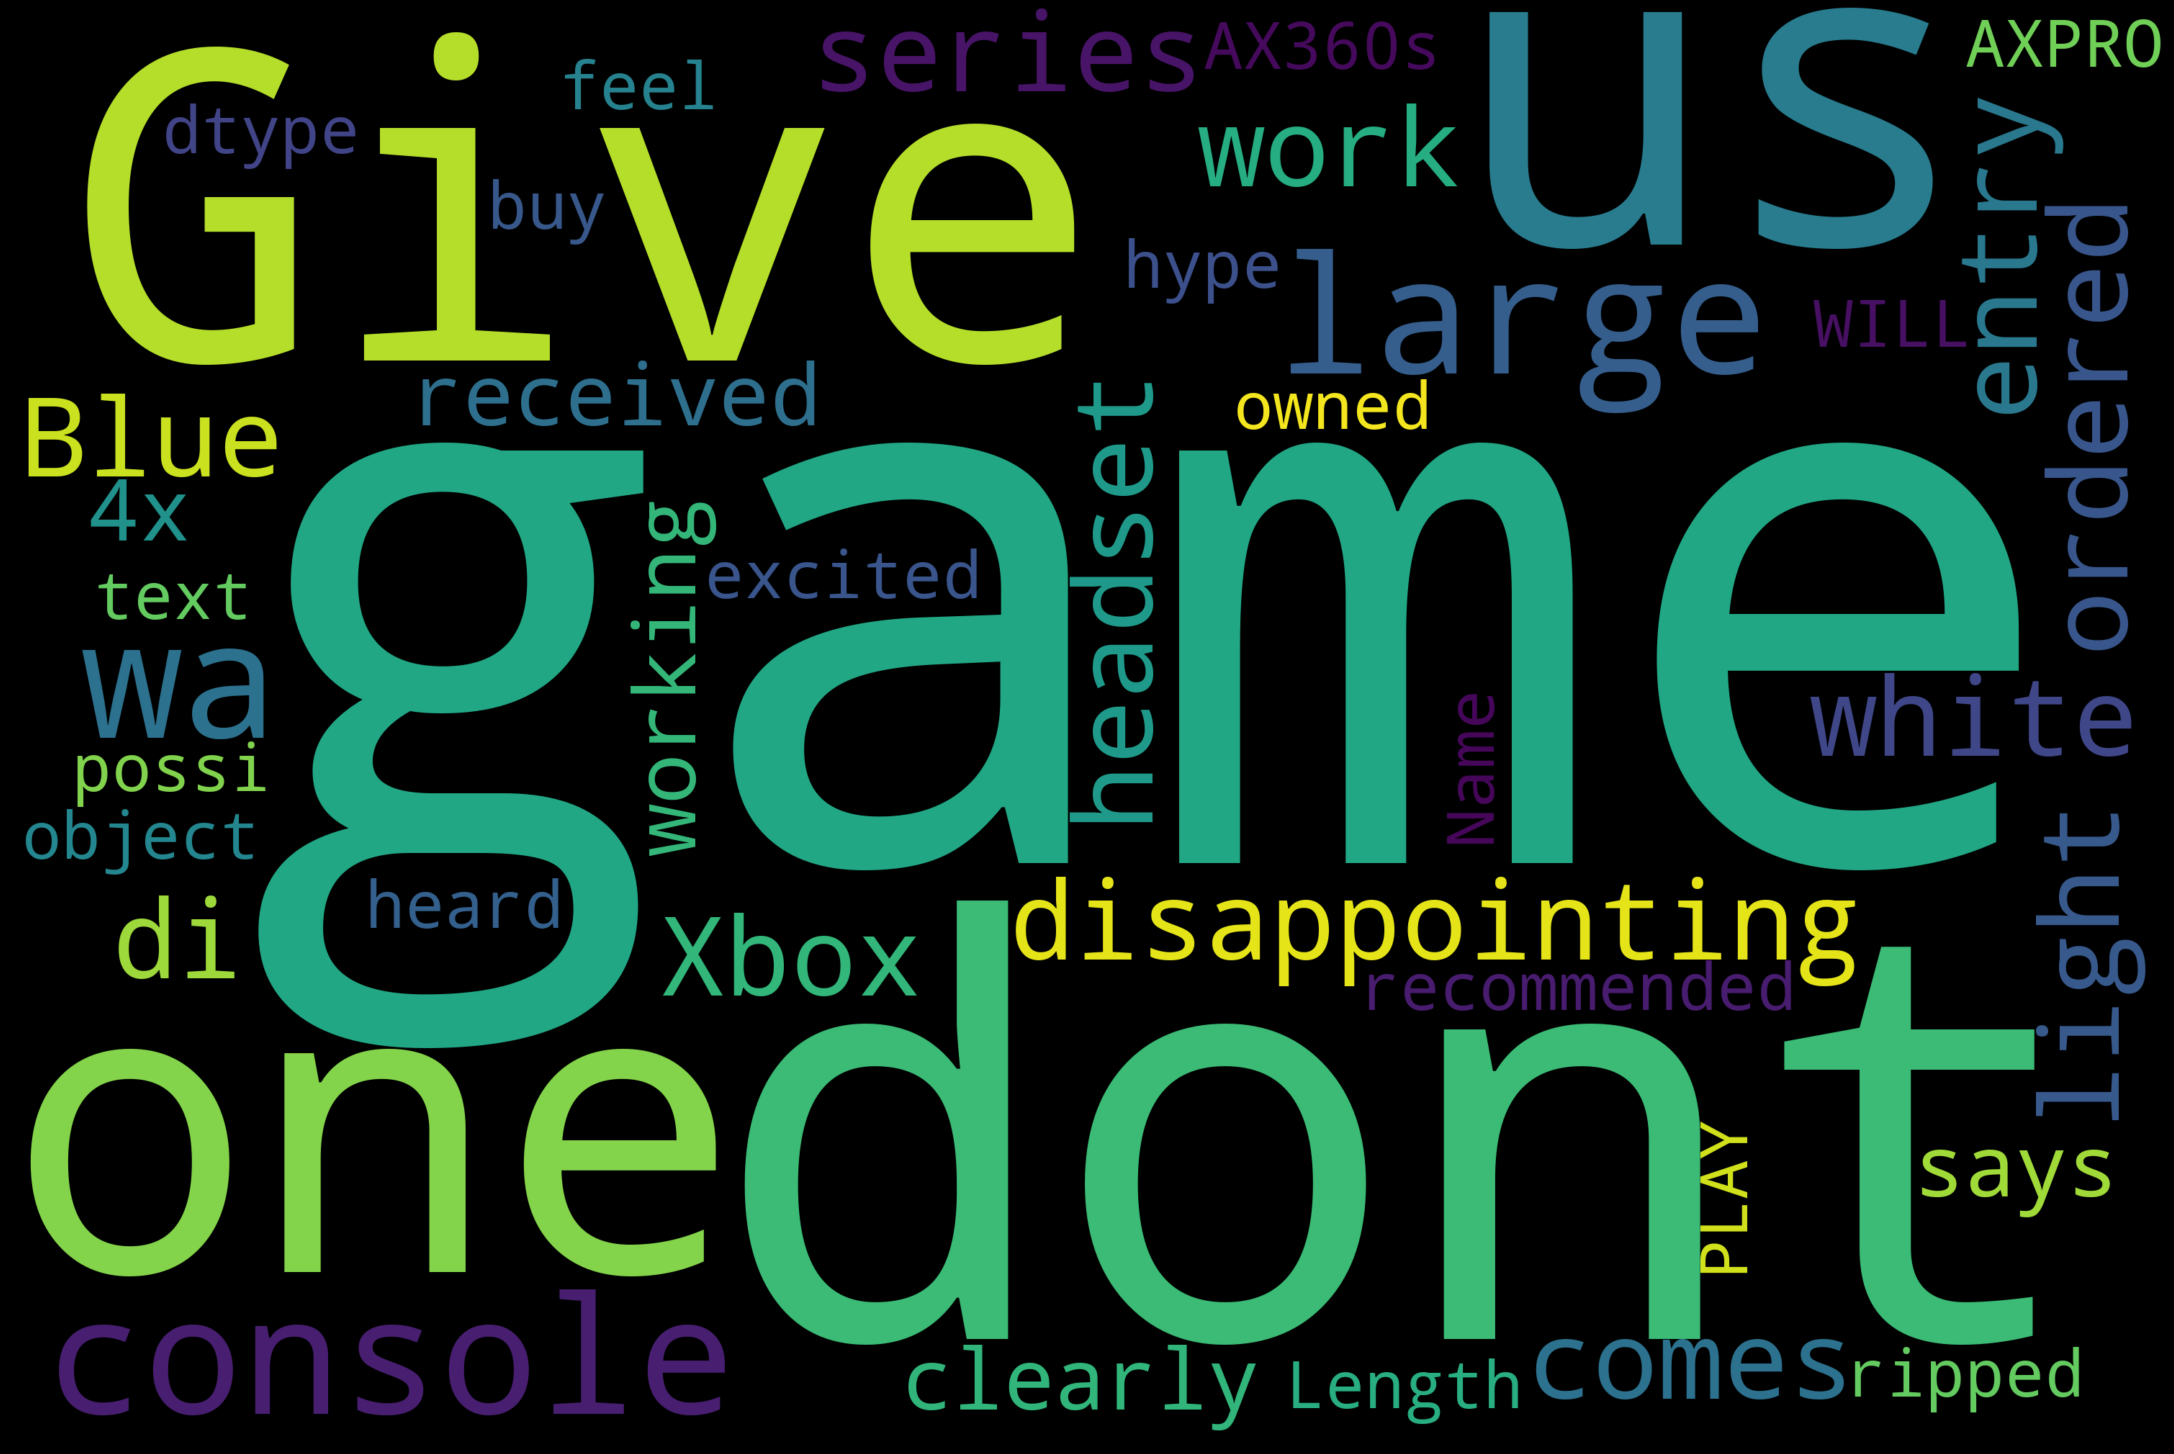

In [ ]:
text = one_star["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**WORD CLOUD OF 2 STARS**

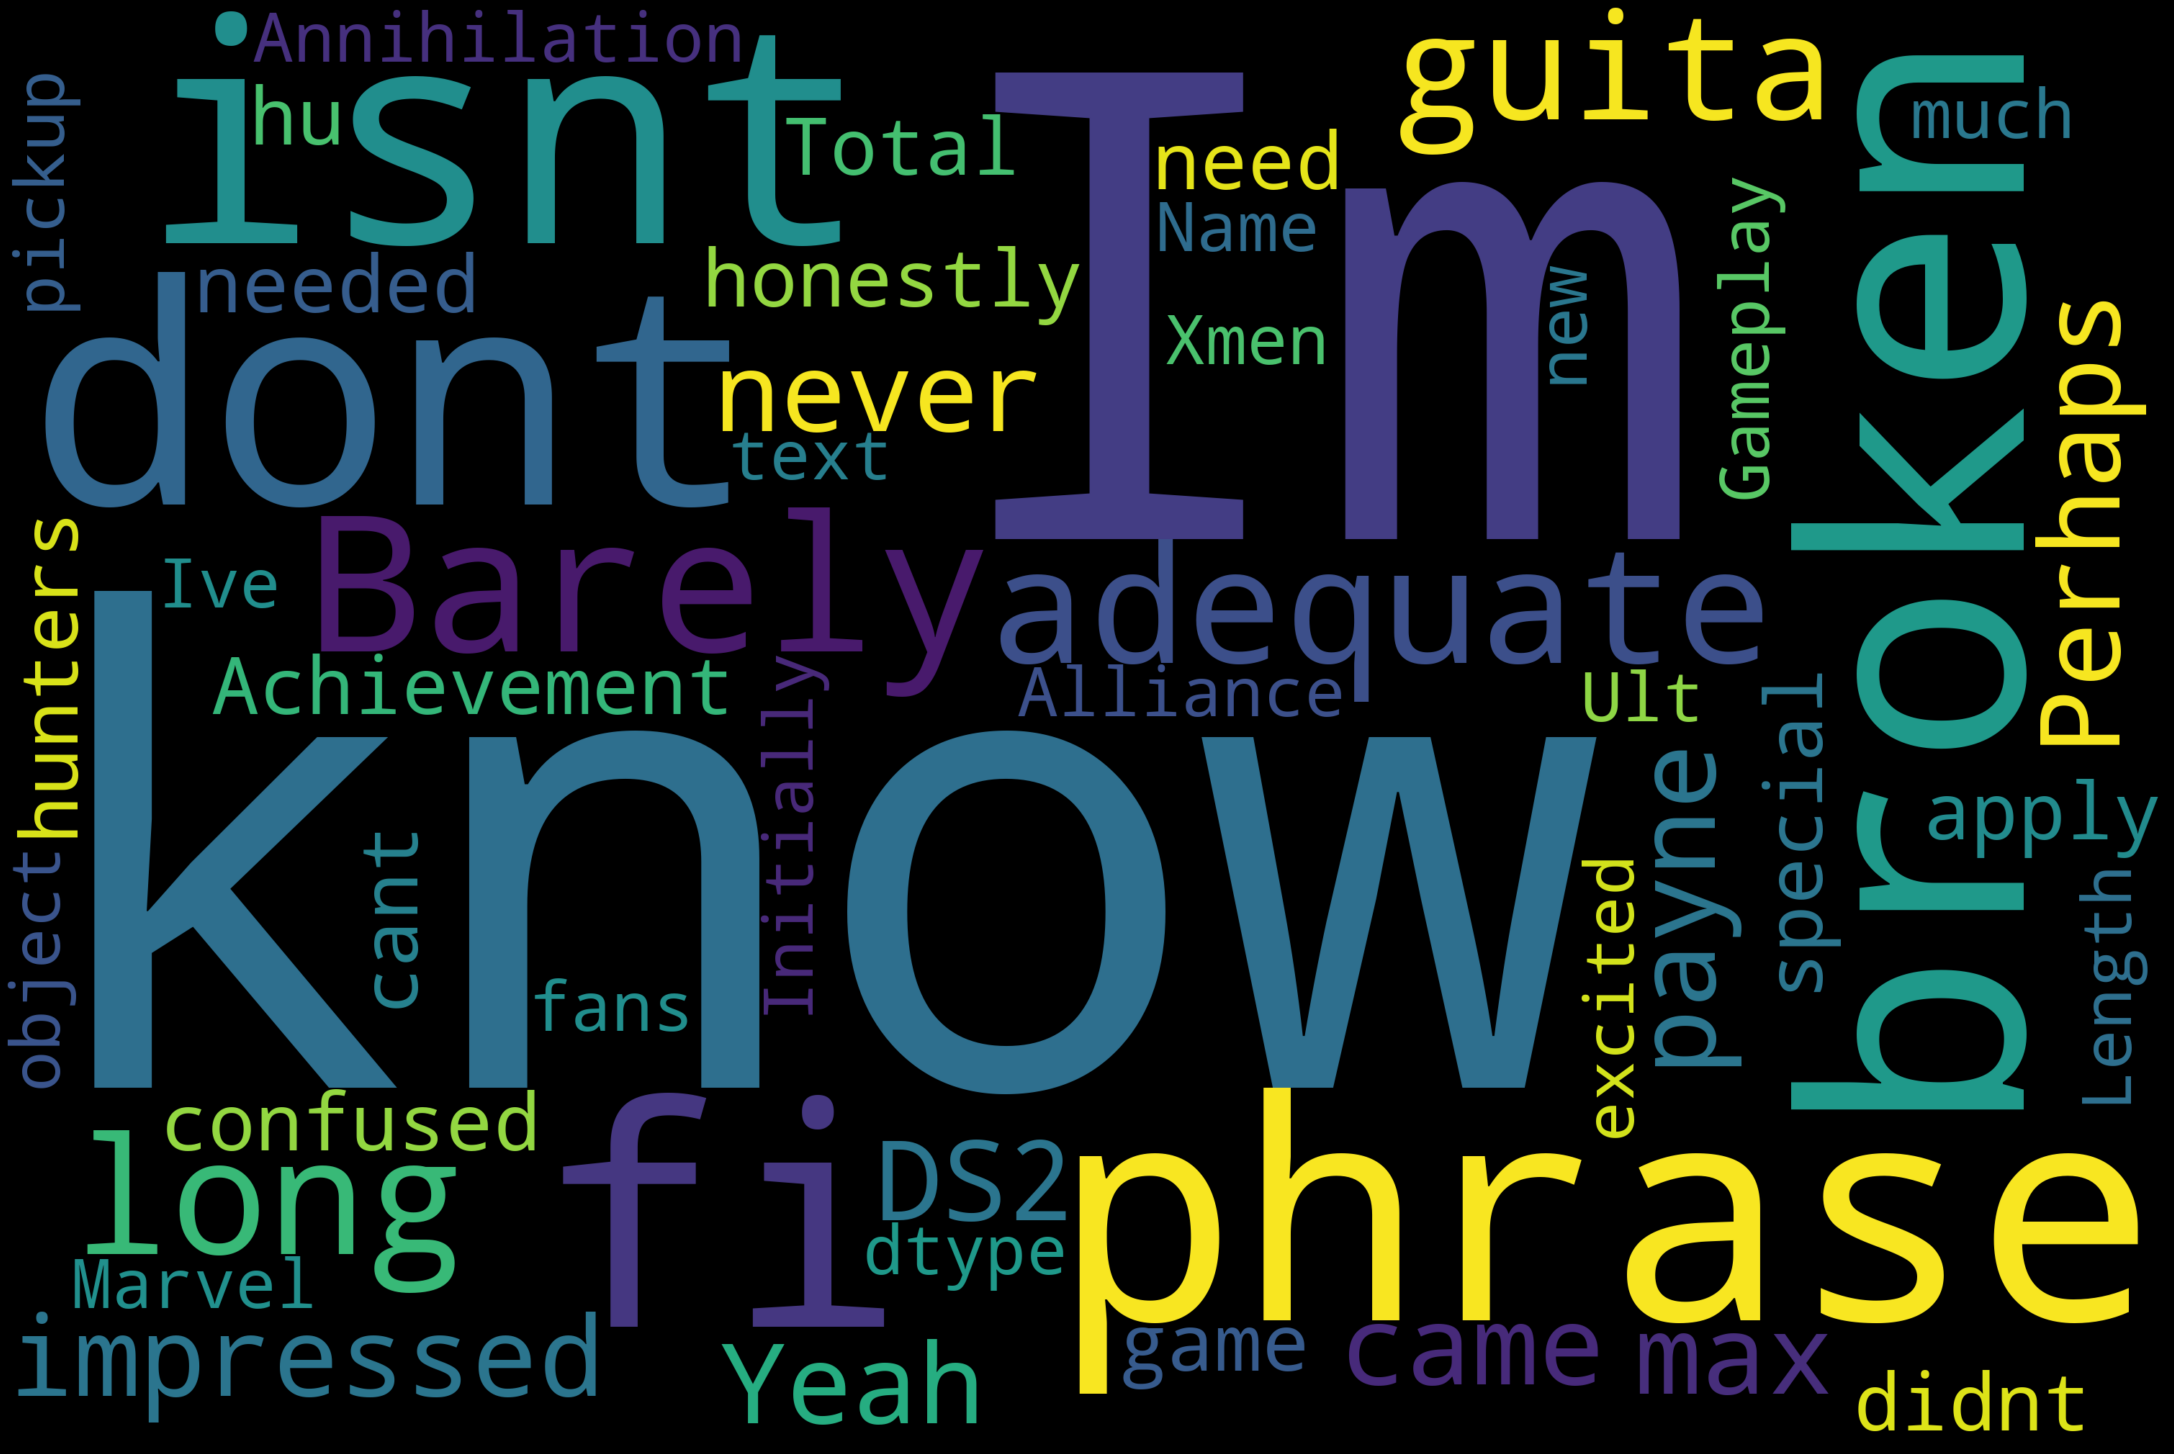

In [ ]:
text = two_stars["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**WORD CLOUD OF 3 STARS**

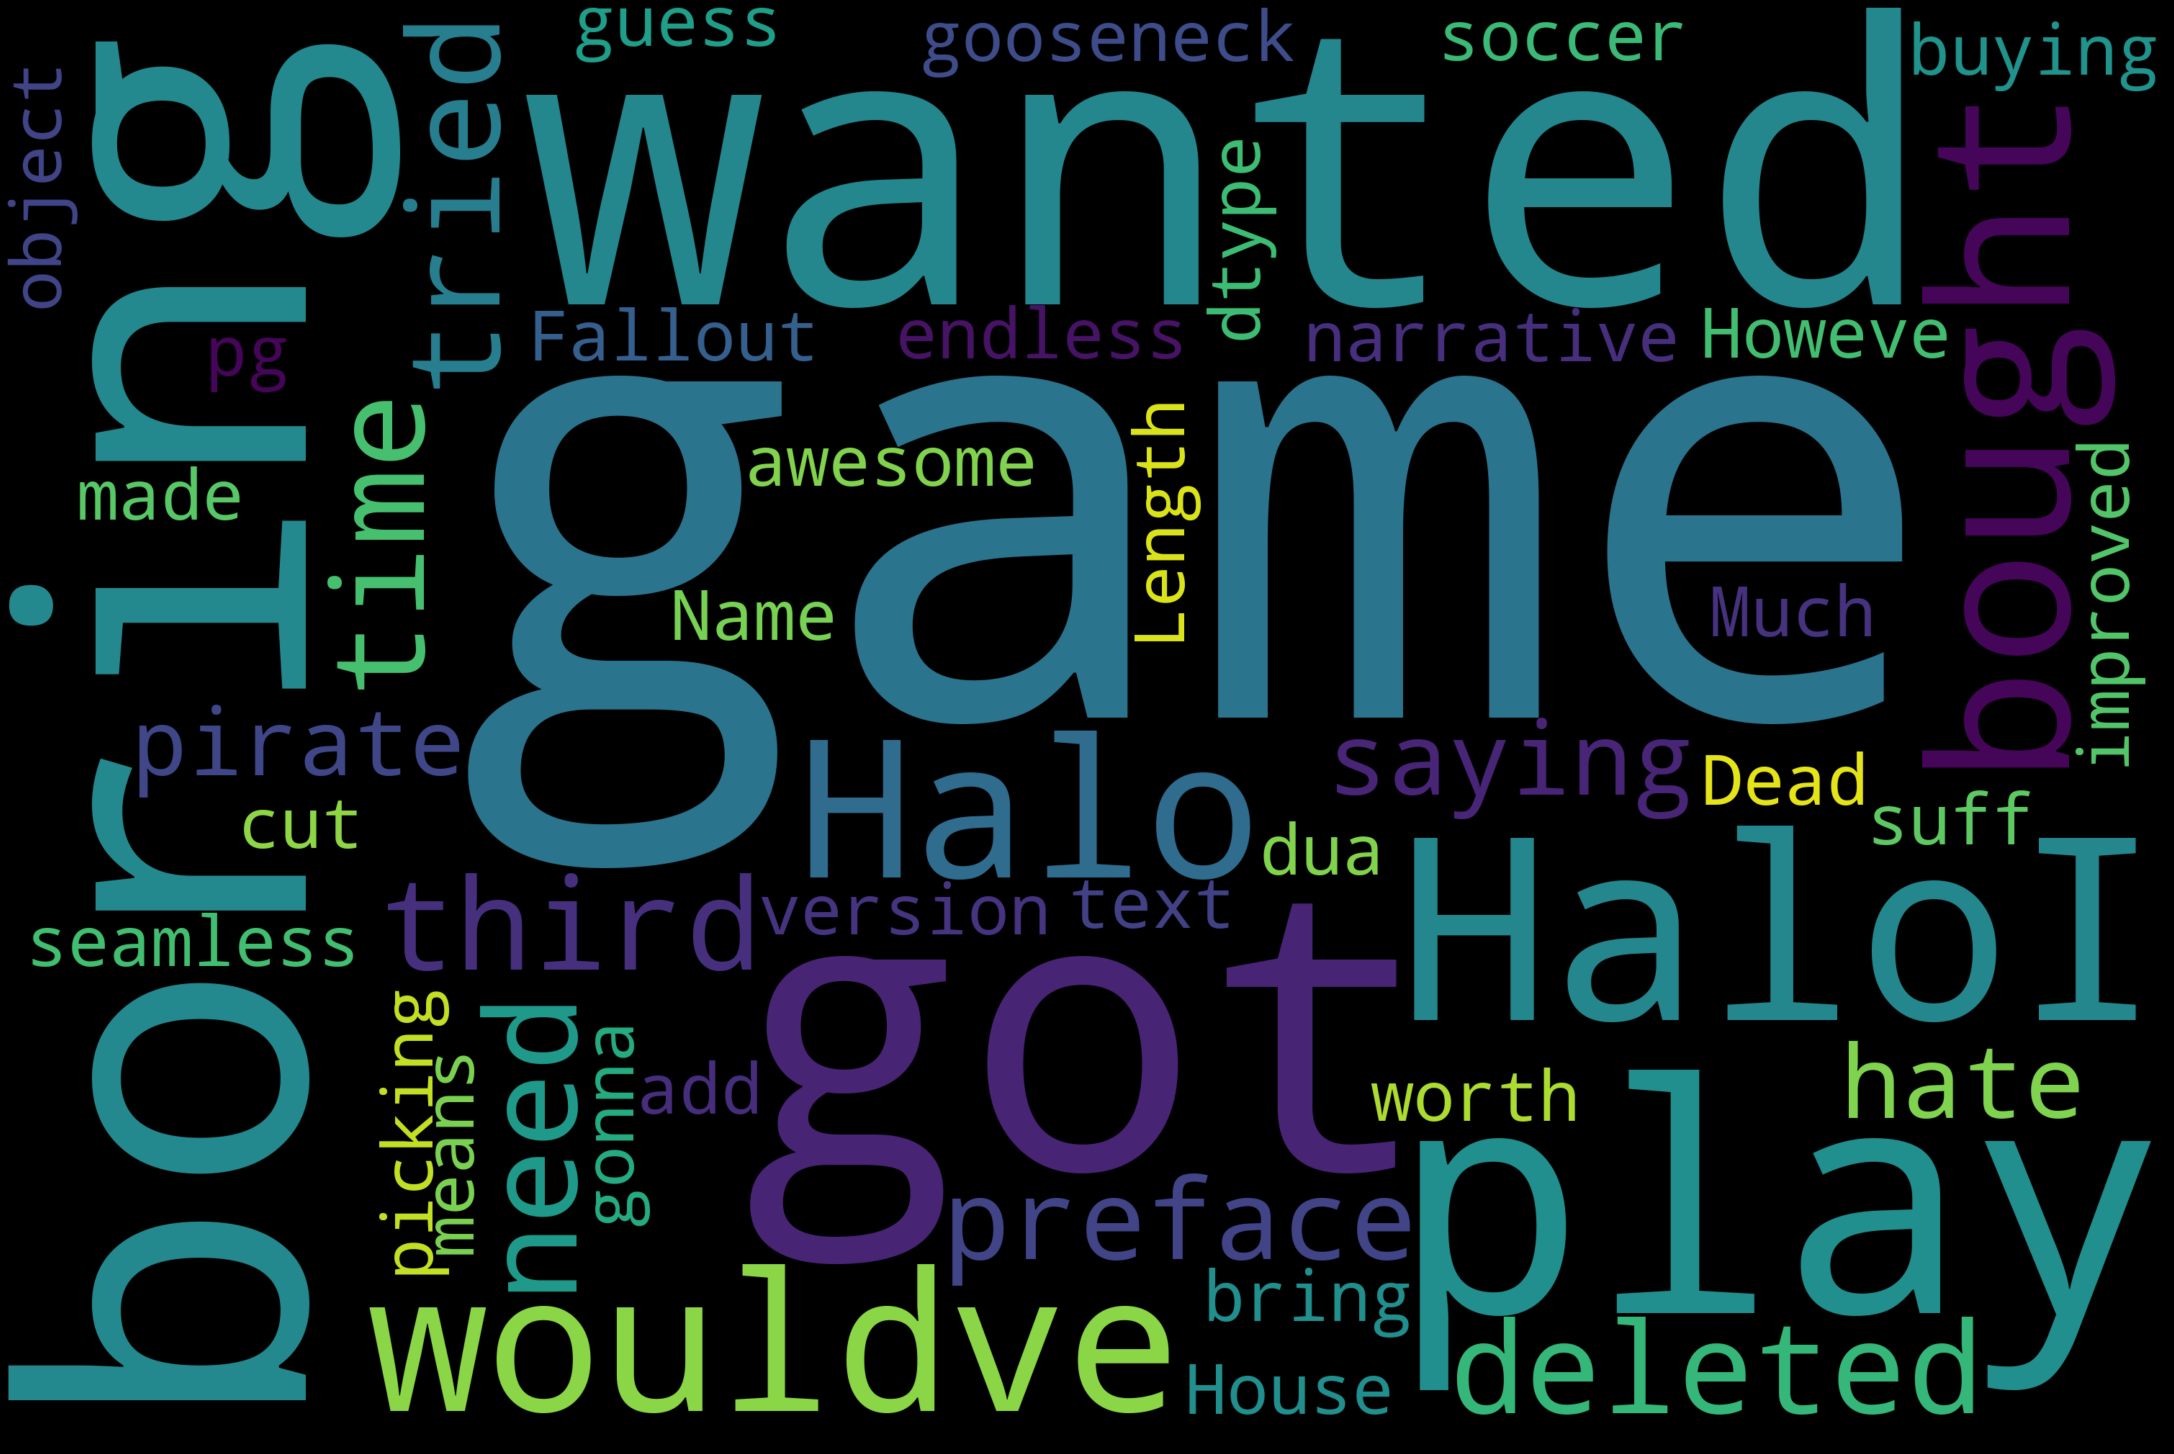

In [ ]:
text = three_stars["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**WORD CLOUD OF FOUR STARS**

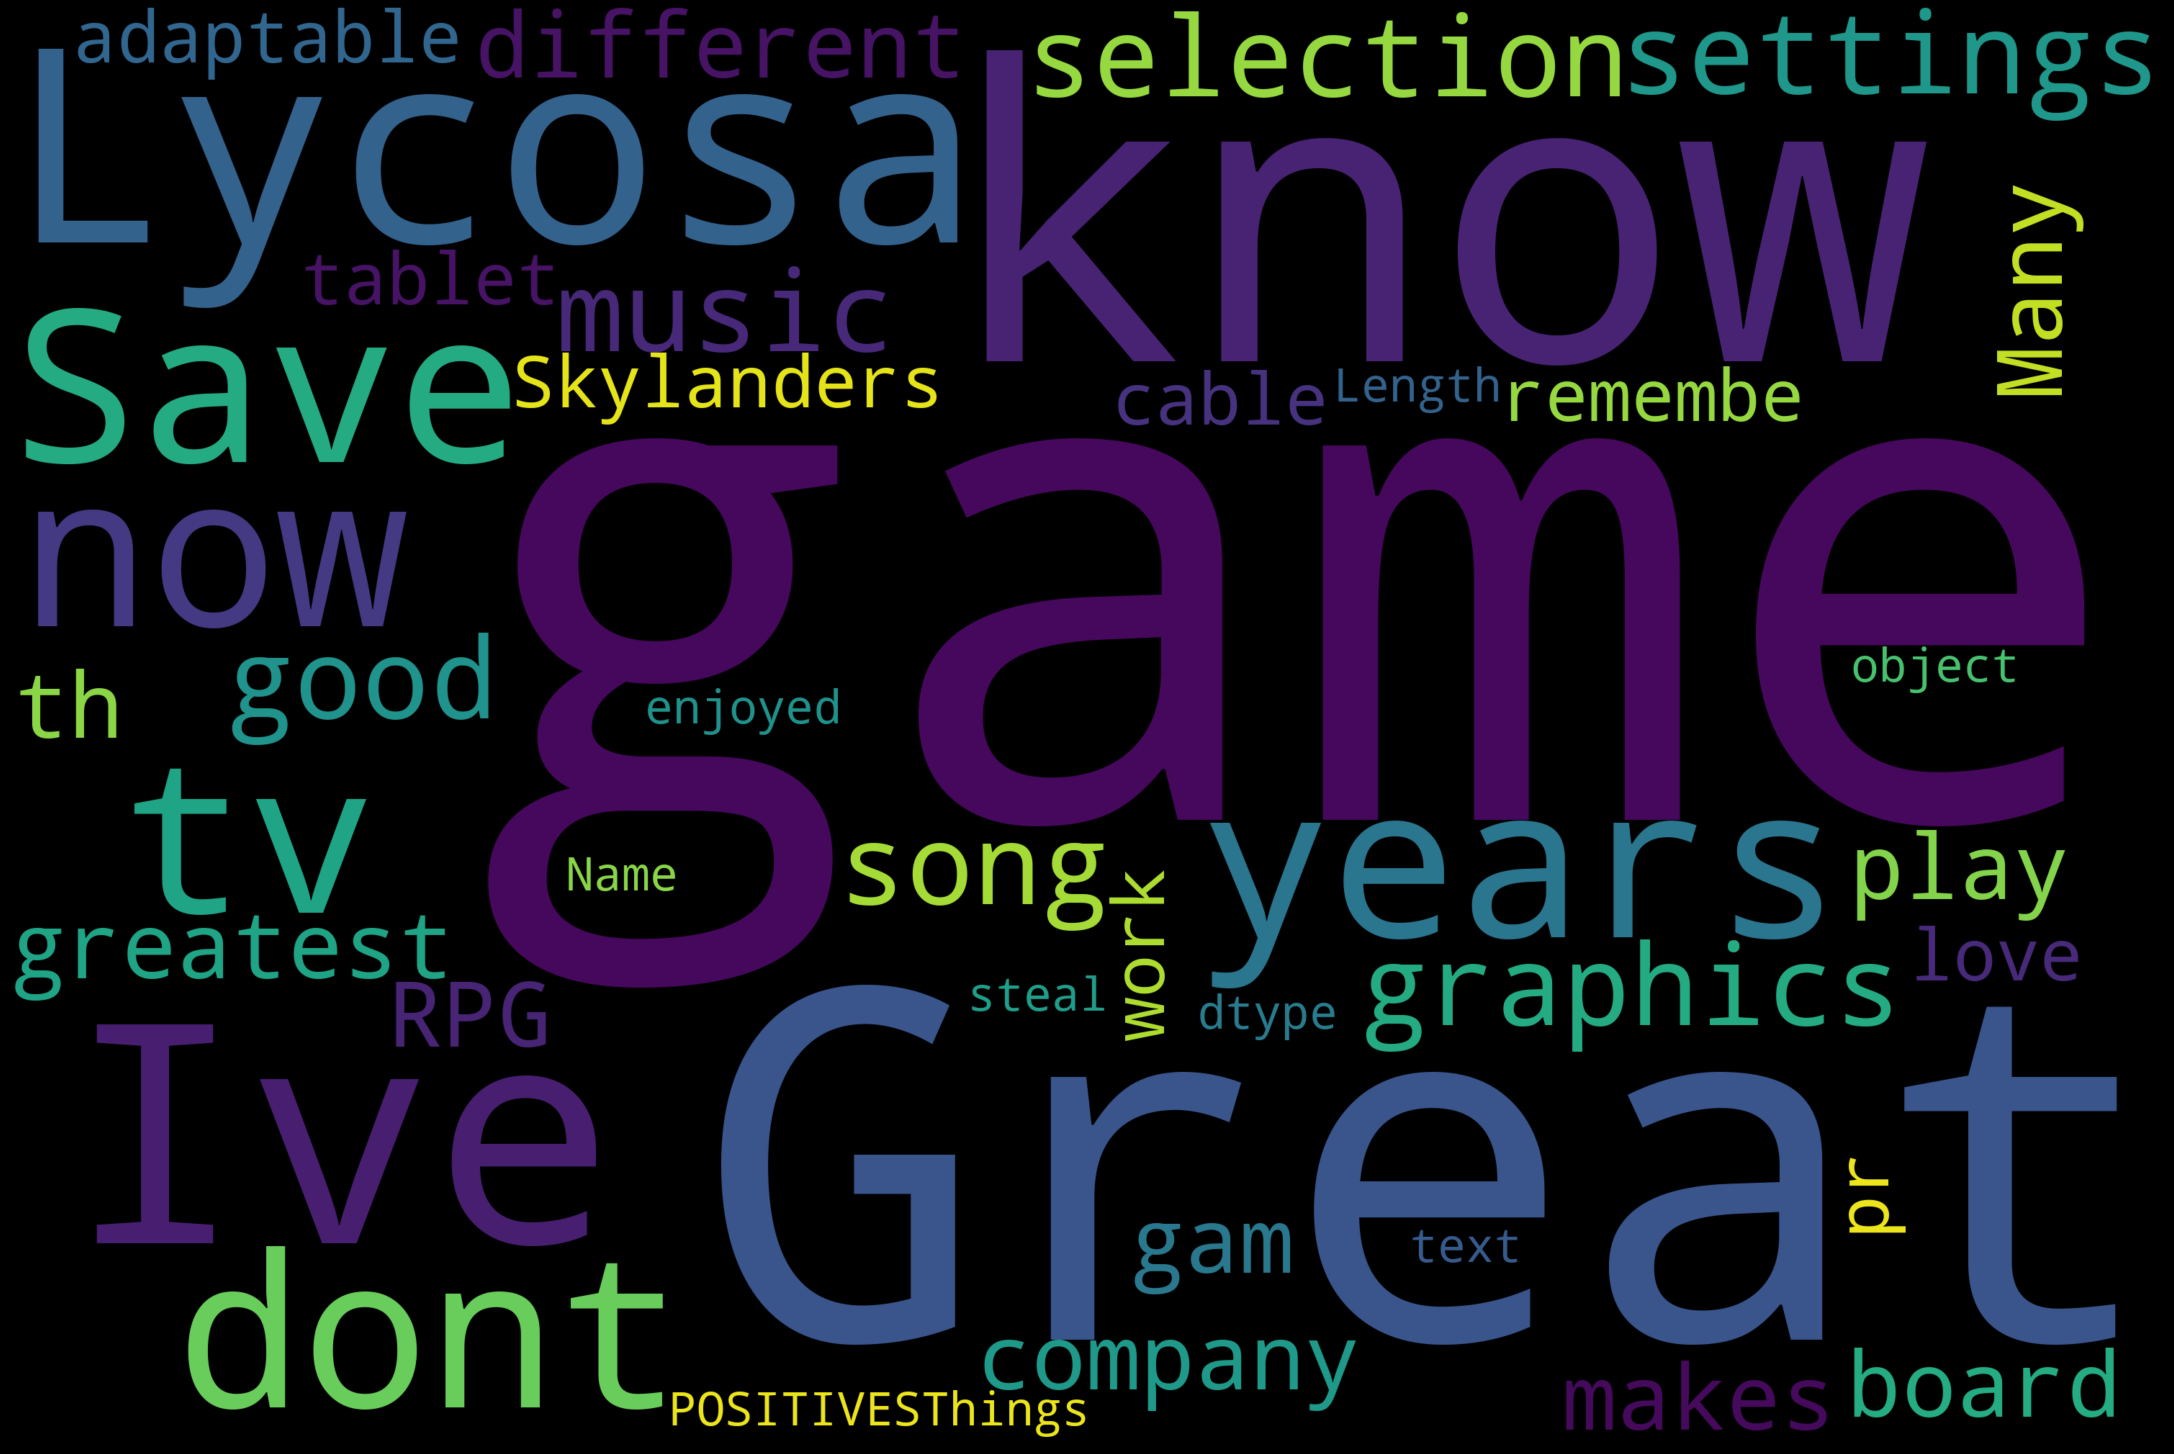

In [ ]:
text = four_stars["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**WORD CLOUD OF 5 STARS**

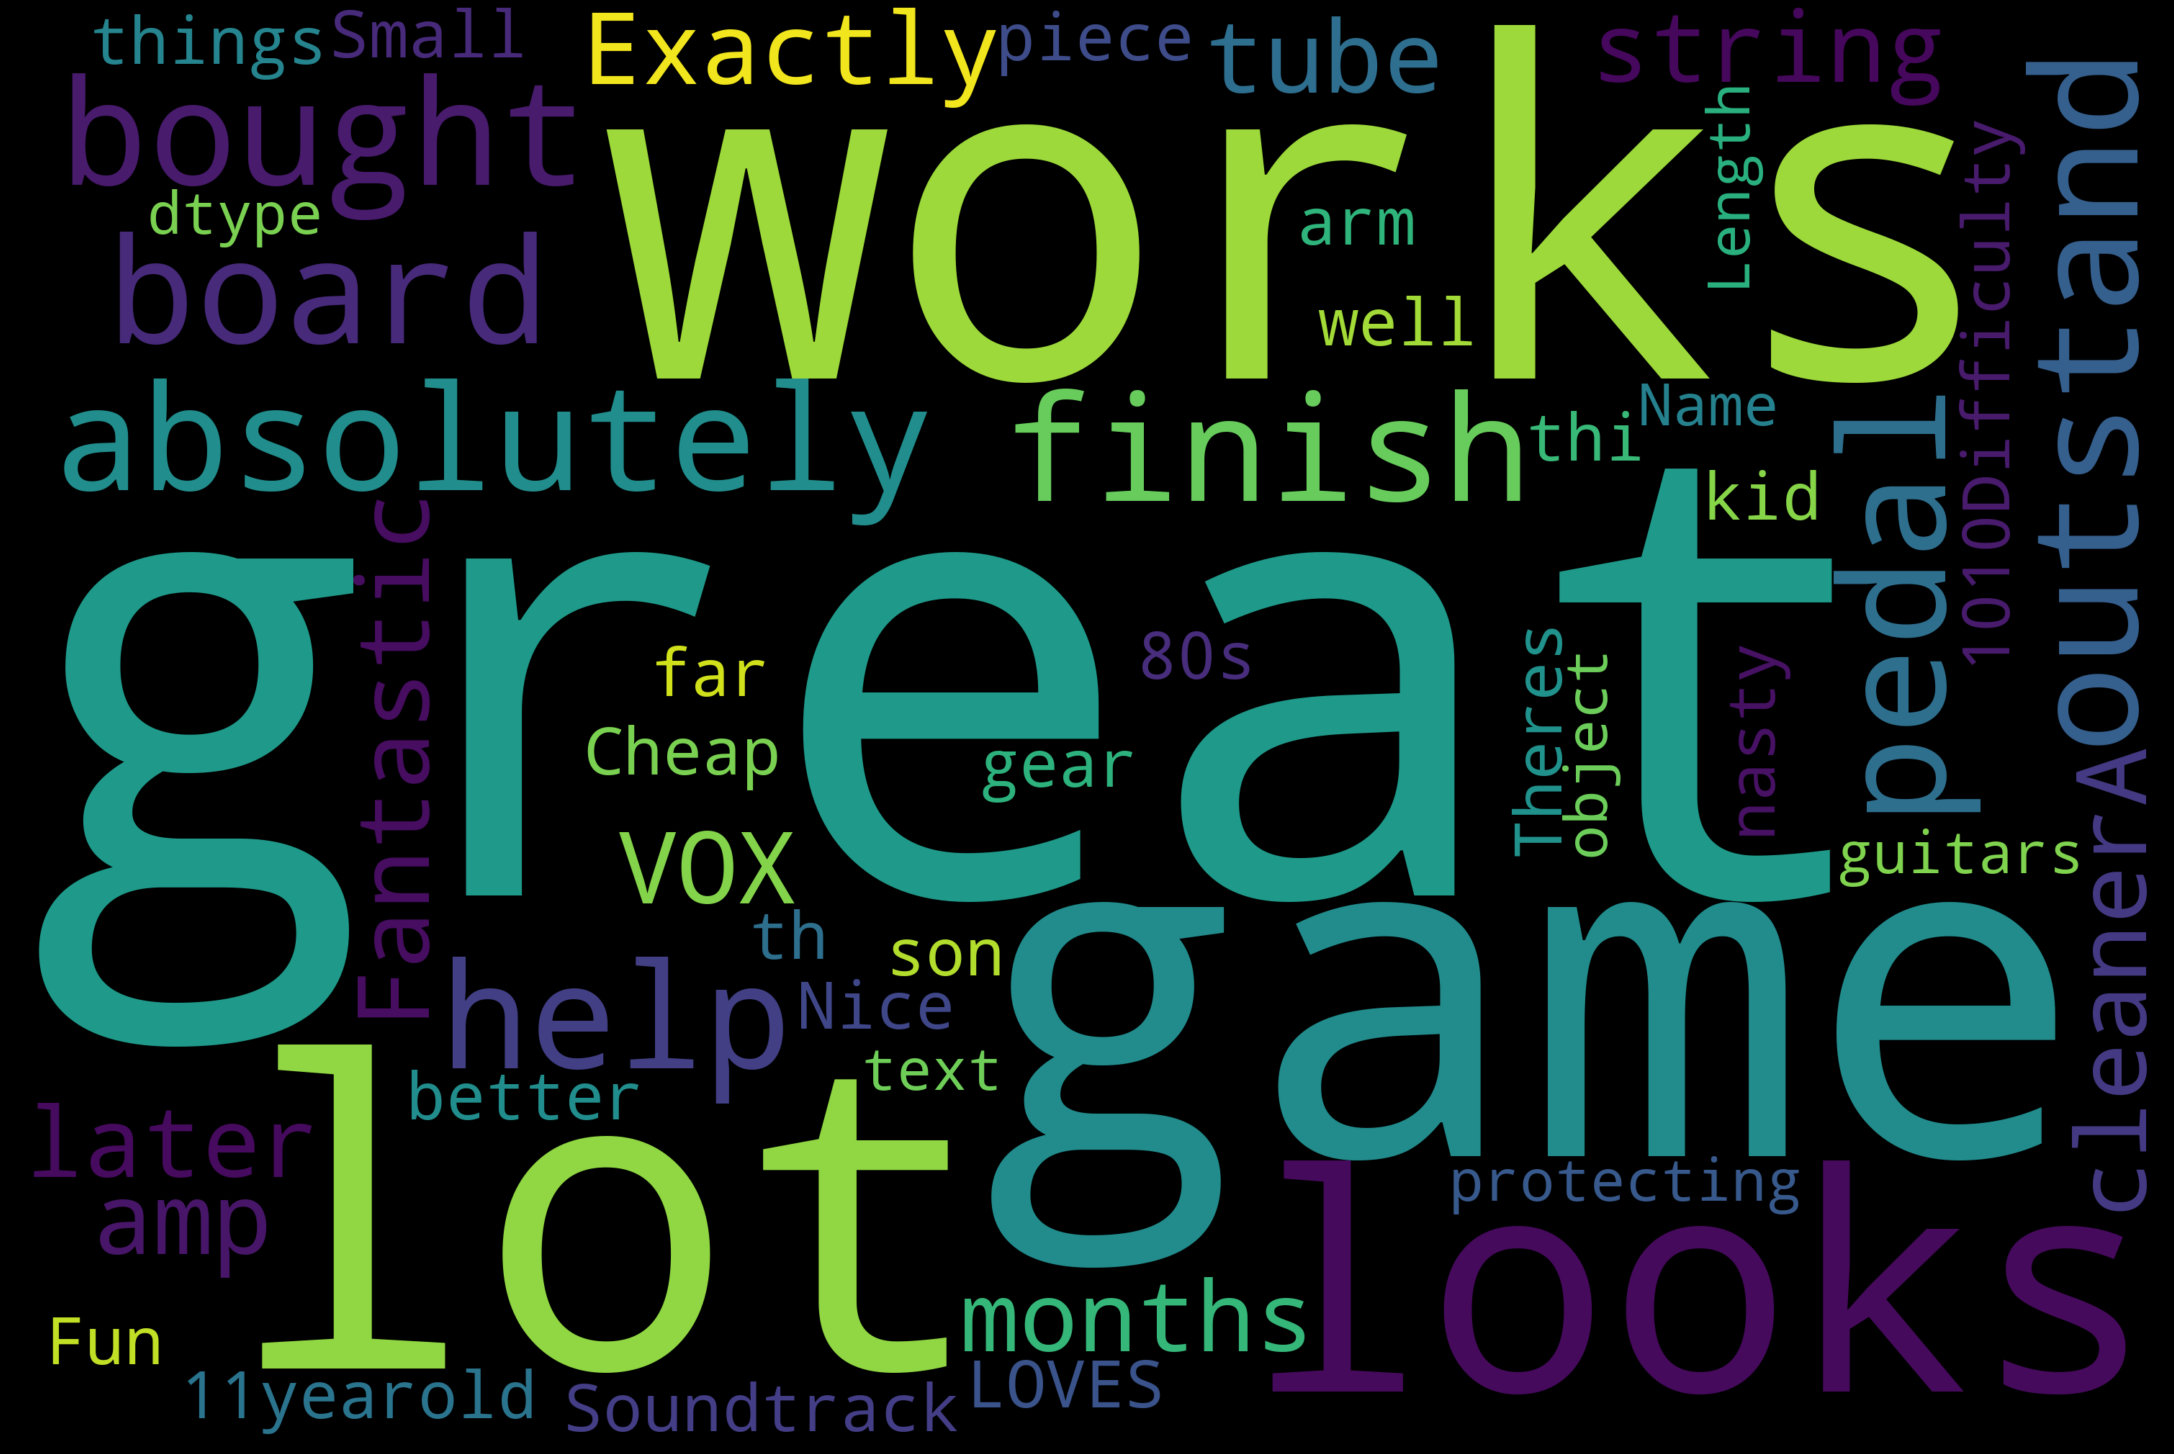

In [ ]:
text = five_stars["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# I will remove the punctuation, stop words , bad characters. I will convert lower cases and stemmed them using the porter stemmer.
stop = stopwords.words('english')
print(stop[::10])

porter = PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


# **STEMMING**

I used Porter Stemmer again because it gave me excellent results in part1. I decided to use PorterStemmer() because The most common in English is Porter Stammer.

In [ ]:
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_text_df)):
    review = re.sub('[^a-zA-Z]', ' ', review_text_df['text'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords_list]
    review = ' '.join(review)
    corpus.append(review)    

In [ ]:
def remove_punctuation(description):
    """The function to remove punctuation"""
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [ ]:
text_df['text'] = text_df['text'].apply(remove_punctuation)
text_df['text'] = text_df['text'].apply(remove_stopwords)
text_df['text'] = text_df['text'].apply(stemmer)

In [ ]:
corpus[3]

'fantast string cleanera month later I use month whenev matter I bow seem mind sound lousi just tip bottl onto clean cloth hold two second then squeez string cloth rub way time when done let string dri short after good clean string sound fresh new beauti cellist tool great product string'

In [ ]:
y=text_df['review_score']

# **TF-IDF**

In [ ]:
#"Term Frequency — Inverse Document Frequency" is abbreviated as TF-IDF. This is a method for calculating the number of words in a collection of documents.
# We usually assign each word a score to indicate its prominence in the document and corpus. In the fields of information retrieval and text mining, this method is commonly employed.
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_text_df['text'])

# **SMOTE**

In [ ]:
# The first method to use when working with an unbalanced dataset is to adjust the class distributions by resampling the data. 
# These methods are undersampling, oversampling and some advanced sampling techniques.
# SMOTE (Synthetic Minority Over-Sampling Technique) is an oversampling process that produces synthetic data. It is one of the most commonly used methods in data science projects.
# The main idea of ​​the method is to create new instances of the minority class by performing certain operations between instances of the minority class.
# I preferred the SMOTE to make the dataset distributed equally.
# I checked the last situation and they are equal right now.(22771)
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({4: 20191, 3: 6172, 2: 3136, 0: 1860, 1: 1544})
Resampled dataset shape Counter({4: 20191, 3: 20191, 0: 20191, 2: 20191, 1: 20191})


In [ ]:
## Divide the dataset into Train and Test
# I preferred the 0.75 and 0.25 division for train and test.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

# **CONFUSION MATRIX**

In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **BASIC ML METHODS**

In [ ]:
#Metrics libraries
# First I want to see which algortihm provides better results. After that I will try to improve the performance with the most suitable parameters.
# I will check the performances of Logistic Regression, DecisionTreeClassifier, Support Vector Machine and BernoulliNB.
# I am planning to optimize the best one.
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.6610947698383451
Decision Tree Test Accuracy: 0.5818923212334643
KNN Test Accuracy: 0.5905539931599397
SVC Test Accuracy: 0.6650759508986007
Naive Bayes Test Accuracy: 0.5729265409299933


# **HYPER PARAMETER TUNING FOR LOGICAL REGRESSION**

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=75.43120063354607, random_state=0)
The mean accuracy of the model is: 0.7190855422164111


In [ ]:
# from the selected parameters I get the accuracy result.
# c = 75.43120063354607 random state is selected as '0'
logreg = LogisticRegression(C=75.43120063354607, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [ ]:
# I used a different value than the best parameters to see the changes.
# Accuracy is reduced when I changed the parameter as expected.
logreg = LogisticRegression(C=1.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [ ]:
print(X_test)

  (0, 1449)	0.10264448796649989
  (0, 3348)	0.098540297415839
  (0, 4290)	0.10451096854459892
  (0, 3755)	0.10354817558105438
  (0, 2596)	0.10247021981571577
  (0, 2298)	0.10007704945203931
  (0, 4295)	0.09935859052980776
  (0, 4560)	0.10373576393797297
  (0, 2995)	0.10052557611215662
  (0, 2076)	0.09343474133835795
  (0, 2996)	0.10037454415353486
  (0, 2333)	0.08987011974047808
  (0, 3697)	0.08737057474073323
  (0, 973)	0.0937188431449989
  (0, 244)	0.10451096854459892
  (0, 1971)	0.1047113183954071
  (0, 3717)	0.10052557611215662
  (0, 1627)	0.09908074291178391
  (0, 963)	0.0973922757599715
  (0, 759)	0.07381574545086837
  (0, 1441)	0.08640856829004119
  (0, 1445)	0.08600667820691832
  (0, 283)	0.07431922994379542
  (0, 4253)	0.08712411732452932
  (0, 4731)	0.09261391349904037
  :	:
  (25238, 558)	0.08933092719908153
  (25238, 2742)	0.2121757151897359
  (25238, 285)	0.05064146506036504
  (25238, 4189)	0.057034240122715844
  (25238, 4875)	0.11139203666902114
  (25238, 2549)	0.08646768

Confusion matrix, without normalization


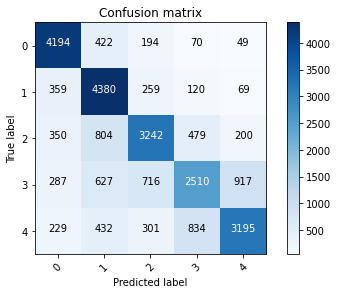

In [ ]:
# Drawing the confusion matrix after hyper tuning to visualize it.

cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0,1,2,3,4])

In [ ]:
# For classification problems f1 score is so IMPORTANT!
# The result is really nice and LOGISTIC REGRESSION is suitable for this dataset.
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      4929
           1       0.66      0.84      0.74      5187
           2       0.69      0.64      0.66      5075
           3       0.63      0.50      0.55      5057
           4       0.72      0.64      0.68      4991

    accuracy                           0.69     25239
   macro avg       0.69      0.69      0.69     25239
weighted avg       0.69      0.69      0.69     25239



# **PREDICTION WITH NEURAL NETWORK - RNN(LSTM)**

In this part, I will directly impliment the neural network . I used data cleaning, data splitting methods in previous parts so, I will not implement all of them again.

In [ ]:
thirdset.head(10)

review_id                                               text  \
0  product_review_000000  Just a great game It looks absolutely outstand...   
1  product_review_000001  I bought these to help finish a pedal board I ...   
2  product_review_000002  Exactly the same tube that was in my amp VOX V...   
3  product_review_000003  Fantastic string cleanerA few months later  I ...   
4  product_review_000004  My 11yearold son LOVES this game  He is an arm...   
5  product_review_000005  I was very skeptical for this game coming to V...   
6  product_review_000006  I tried this case it would work if only you co...   
7  product_review_000007  Ive had a Lycosa for about 3 years now Save so...   
8  product_review_000008  This is a great game at first I wasnt sure I w...   
9  product_review_000009  Give us only one large console which i dont wa...   

  verified review_score     product_category  
0     True          5.0          video_games  
1     True          5.0  musical_instruments  
2     True          5.0  musical_instruments  
3     True          5.0  musical_instruments  
4     True          5.0          video_games  
5    False          5.0          video_games  
6     True          5.0          video_games  
7    False          4.0          video_games  
8    False          5.0          video_games  
9    False          1.0          video_games

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(thirdset['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 92690 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(thirdset['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (32903, 250)


In [ ]:
Y = pd.get_dummies(thirdset['review_score']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (32903, 5)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(29612, 250) (29612, 5)
(3291, 250) (3291, 5)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
417/417 [==============================] - 179s 422ms/step - loss: 0.9625 - accuracy: 0.6391 - val_loss: 0.8761 - val_accuracy: 0.6492
Epoch 2/10
417/417 [==============================] - 181s 435ms/step - loss: 0.7468 - accuracy: 0.7069 - val_loss: 0.8404 - val_accuracy: 0.6688
Epoch 3/10
417/417 [==============================] - 176s 422ms/step - loss: 0.6374 - accuracy: 0.7545 - val_loss: 0.8624 - val_accuracy: 0.6766
Epoch 4/10
417/417 [==============================] - 176s 422ms/step - loss: 0.5447 - accuracy: 0.7963 - val_loss: 0.8970 - val_accuracy: 0.6675
Epoch 5/10
417/417 [==============================] - 165s 395ms/step - loss: 0.4599 - accuracy: 0.8340 - val_loss: 0.9379 - val_accuracy: 0.6732


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
train_acc = model.evaluate(X_test, Y_test, verbose=0)
test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(train_acc)
print(test_acc)

103/103 [==============================] - 4s 34ms/step - loss: 0.9686 - accuracy: 0.6706
Test set
  Loss: 0.969
  Accuracy: 0.671
[0.9686257243156433, 0.6706168055534363]
[0.9686257243156433, 0.6706168055534363]


In [ ]:
print(accr)

[0.9686257243156433, 0.6706168055534363]


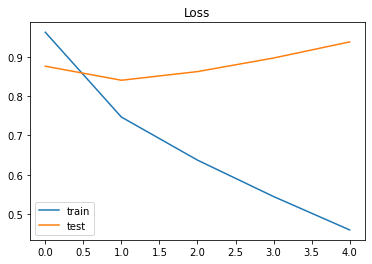

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

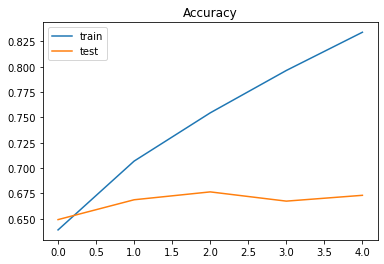

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# **Showing 3-10 examples from test dataset.**

It is correct!.First example returned correct answer. It should return 5 and in this case, I encoded the labels so 4 is actually 5. We predicted the correct star amount!

In [ ]:
text1 = ['Just a great game. It looks absolutely outstanding on the One. Things have changed a bit with the right stick, you now being able to both do dribble moves with it and shoot, but it gets easier with time. Would recommend to any basketball fans out there!. Love it']
seq = tokenizer.texts_to_sequences(text1)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = [0,1,2,3,4]
print(pred, labels[np.argmax(pred)])

[[9.5340062e-04 7.7101635e-04 3.8673442e-03 9.4205245e-02 9.0020299e-01]] 4


It is Correct again!. The result was 1 and it returned 0 which is encoded value of 1. It is predicted correctly.

In [ ]:
text2 = ['clearly says 4x.... only received 2. also, they are absolutely nothing like XBOX One thumbsticks. they are hard plastic with no rubber to speak of. they are also much shallower than the xbox one thumbstucks. horrible item and completely misrepresented product.. product misrepresentation. nothing like xbox one sticks.']
seq = tokenizer.texts_to_sequences(text2)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = [0,1,2,3,4]
print(pred, labels[np.argmax(pred)])

[[9.7809613e-01 1.5966667e-02 1.1037955e-03 6.1282888e-04 4.2205541e-03]] 0


It is correct again! . The result returned 1 which is encoded version of 2.Review score predicted correctly again.

In [ ]:
text3 = ['A little disappointed with the latency ...had to return the merchandise. ']
seq = tokenizer.texts_to_sequences(text3)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = [0,1,2,3,4]
print(pred, labels[np.argmax(pred)])

[[0.2624469  0.26842043 0.11933819 0.11023904 0.23955534]] 1


It is WRONG! but it returned 2 instead of correct result 3. it shows us that algorithm works really efficient.

In [ ]:
text4 = ['You already have the mono headset that comes with the PS4. Keep it, and do not waste money on this headset. There will soon be an update that will make most of the previous gen headsets backward compatible with the PS4, so I would suggest that you wait it out.. Not much of an upgrade']
seq = tokenizer.texts_to_sequences(text4)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = [0,1,2,3,4]
print(pred, labels[np.argmax(pred)])

[[0.37573364 0.41671416 0.13513754 0.02146455 0.05094996]] 1


# **CHANGING THE ACTIVATION PARAMETER**

activation parameter changed from softmax to relu and performance reduced dramatically.In general, we apply ReLU in the hidden layer to prevent the vanishing gradient problem and improve computation performance, and we use Softmax in the final output layer.In this situation, the ReLU non-linearity (now almost entirely utilised) will simply discard information without providing any additional value.

In [ ]:
model8 = Sequential()
model8.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model8.add(SpatialDropout1D(0.2))
model8.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model8.add(Dense(5, activation='relu'))
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history8 = model8.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
417/417 [==============================] - 164s 387ms/step - loss: 1.2797 - accuracy: 0.5908 - val_loss: 1.2615 - val_accuracy: 0.6202
Epoch 2/10
417/417 [==============================] - 162s 389ms/step - loss: nan - accuracy: 0.1832 - val_loss: nan - val_accuracy: 0.0567
Epoch 3/10
417/417 [==============================] - 164s 393ms/step - loss: nan - accuracy: 0.0567 - val_loss: nan - val_accuracy: 0.0567
Epoch 4/10
417/417 [==============================] - 160s 384ms/step - loss: nan - accuracy: 0.0567 - val_loss: nan - val_accuracy: 0.0567


In [ ]:
accr = model8.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
train_acc = model8.evaluate(X_test, Y_test, verbose=0)
test_acc = model8.evaluate(X_test, Y_test, verbose=0)
print(train_acc)
print(test_acc)

103/103 [==============================] - 4s 34ms/step - loss: nan - accuracy: 0.0547
Test set
  Loss: nan
  Accuracy: 0.055
[nan, 0.05469462275505066]
[nan, 0.05469462275505066]
